In [3]:
1+1

2

In [4]:
%%time

import uproot
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import h5py
import math

from util import *

import var
import cut
import data
import hist

import importlib

from pyanalib import panda_helpers
#from unc_funcs import *
from unc_samples import *

from unc_MC_overhead import *


CPU times: user 197 µs, sys: 0 ns, total: 197 µs
Wall time: 211 µs


In [5]:
# Thresholds to use for Cuts - NOMINAL

NuMI_angle_thresh = 0.11 #0.13 #0.06 (Nominal: 0.11) (Optimized: 0.05)
open_angle_thresh = 0.7 #0.8 #0.2 (Nominal: 0.7) (Optimized:  0.35)
max_shw_len_thresh = 20. #25 #0 #cm (Nominal: 20) (Optimized: 0.)
#other_trk_len_thresh =  #cm (Nominal: ) (Optimized: 0.)
#third_trk_dist_thresh =  #cm (Nominal: ) (Optimized: 0.)

trk_len_thresh = 140. # cm

#hasstub = (df.stub.l0_5cm.dqdx > 5e5) | (df.stub.l1cm.dqdx > 3e5) | (df.stub.l2cm.dqdx > 2.5e5) | (df.stub.l3cm.dqdx > 2e5)
stub_dqdx_l0_5cm_thresh = 5e5 #4.1e5 #3.8e5 (Nominal: 500K) (Optimized: 5e5)
stub_dqdx_l1cm_thresh = 4e5 #3.0e5 #1.6e5 #3e5 (Nominal: 400K) (Optimized: 2.4e5)
stub_dqdx_l2cm_thresh =  3.5e5 #2.1e5 #2e5 #2.5e5 (Nominal: 350K) (Optimized: 2e5)
stub_dqdx_l3cm_thresh =  2e5 #1.9e5 #1.4e5 (Nominal: 200K) (Optimized: 1.6e5)
var_ths = [stub_dqdx_l0_5cm_thresh, stub_dqdx_l1cm_thresh, stub_dqdx_l2cm_thresh, stub_dqdx_l3cm_thresh]

stub_dedx_l0_5cm_thresh = 70
stub_dedx_l1cm_thresh = 40
stub_dedx_l2cm_thresh = 25
stub_dedx_l3cm_thresh = 20
var_ths = [stub_dedx_l0_5cm_thresh, stub_dedx_l1cm_thresh, stub_dedx_l2cm_thresh, stub_dedx_l3cm_thresh]

chi2_mu_forMuons = 30 #23 #16 (Nominal: 30) (Optimized: 18)
chi2_p_forMuons = 100 # (Nominal: 100) (Optimized: 90)

# Redo May 31, 2024:

nom_NuMI_angle_thresh = 15 #deg
nom_open_angle_thresh = 30 #deg
nom_max_shw_len_thresh = 20. #25 #cm
nom_trk_len_thresh = 140. # cm

nom_stub_dedx_l0_5cm_thresh = 70
nom_stub_dedx_l1cm_thresh = 40
nom_stub_dedx_l2cm_thresh = 25
nom_stub_dedx_l3cm_thresh = 20
nom_var_ths = [stub_dedx_l0_5cm_thresh, stub_dedx_l1cm_thresh, stub_dedx_l2cm_thresh, stub_dedx_l3cm_thresh]

nom_chi2_mu_forMuons = 20 
nom_chi2_p_forMuons = 100 

In [6]:
# Thresholds to use for Cuts - OPTIMAL

NuMI_angle_thresh = 3
open_angle_thresh = 15
max_shw_len_thresh = 0.

trk_len_thresh = 140. # cm

stub_dedx_l0_5cm_thresh = 50
stub_dedx_l1cm_thresh = 35
stub_dedx_l2cm_thresh = 15
stub_dedx_l3cm_thresh = 10

chi2_mu_forMuons = 13
chi2_p_forMuons = 90 

In [7]:
importlib.reload(var)
importlib.reload(cut)
importlib.reload(data)
importlib.reload(hist)
importlib.reload(panda_helpers)

<module 'pyanalib.panda_helpers' from '/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/pyanalib/panda_helpers.py'>

In [8]:
plt.rcParams.update({'font.size': 16})
mpl.rcParams['lines.linewidth'] = 4.

dosave = True
#savedir = "/icarus/app/users/gputnam/evtsel-ana/plots_Jan9/"
savedir = "/exp/icarus/data/users/jdyer/muon_selection/"

plotdir = savedir+'plots/'

#savedata = False
#datadir = "/icarus/data/users/gputnam/dimuon-data/"


In [9]:
for f in df_files:
    print(f)
#print(f for f in df_files)
for df in evtdfs:
    print(df.shape)

/exp/icarus/data/users/gputnam/thesis-work/DMCP2023G/mc-F/F2-Higgs_M220_nom_evt.df
/exp/icarus/data/users/gputnam/thesis-work/DMCP2023G/mc-F/F2-Higgs_M240_nom_evt.df
/exp/icarus/data/users/gputnam/thesis-work/DMCP2023G/mc-F/F2-Higgs_M260_nom_evt.df
/exp/icarus/data/users/gputnam/thesis-work/DMCP2023G/mc-F/F2-Higgs_M280_nom_evt.df
/exp/icarus/data/users/gputnam/thesis-work/DMCP2023G/mc-F/F2-Higgs_M300_nom_evt.df
/exp/icarus/data/users/gputnam/thesis-work/DMCP2023G/mc-F/F2-Higgs_M340_nom_evt.df
/exp/icarus/data/users/jdyer/DMCP2023G/axions/alp_M300_faE5_evt.df
/exp/icarus/data/users/jdyer/DMCP2023G/axions/alp_M500_faE6_evt.df
/exp/icarus/data/users/jdyer/DMCP2023G/axions/2408/alp_M300_faE6_evt.df
/exp/icarus/data/users/gputnam/thesis-work/DMCP2023G/mc-F/F-MCNuPhase2_evt.df
/exp/icarus/data/users/gputnam/thesis-work/DMCP2023G/mc-F/F-CohLike_nom_evt.df
(27498, 265)
(35153, 265)
(37538, 265)
(21282, 265)
(32845, 265)
(41218, 265)
(24721, 266)
(24357, 266)
(1975, 266)
(408695, 265)
(267425, 

In [10]:
for p in pots: print(p)

1.2139165e+26
2.2434914e+25
1.1231296e+25
4.8350902e+24
7.2858396e+24
1.4283393e+25
7.3614024e+23
1.21001335e+26
2.946429e+26
8.0673304e+20
5.5160685e+21


From running data.mc_dataset function on the bsm samples:

/icarus/data/users/gputnam/DMCP2023G/mc-F/F2-Higgs_M220_nom_evt.df :  
    1.2139165e+26  POT
    
/icarus/data/users/gputnam/DMCP2023G/mc-F/F2-Higgs_M240_nom_evt.df :  
    2.2434914e+25  POT
    
/icarus/data/users/gputnam/DMCP2023G/mc-F/F2-Higgs_M260_nom_evt.df :  
    1.1231296e+25  POT
    
/icarus/data/users/gputnam/DMCP2023G/mc-F/F2-Higgs_M280_nom_evt.df :  
    4.8350902e+24  POT
    
/icarus/data/users/gputnam/DMCP2023G/mc-F/F2-Higgs_M300_nom_evt.df :  
    7.2858396e+24  POT
    
/icarus/data/users/gputnam/DMCP2023G/mc-F/F2-Higgs_M340_nom_evt.df :  
    1.4283393e+25  POT
    
/exp/icarus/data/users/jdyer/DMCP2023G/axions/alp_M300_faE6_evt.df :  
    3.0070923e+27  POT
    
/exp/icarus/data/users/jdyer/DMCP2023G/axions/alp_M500_faE6_evt.df :  
    1.21001335e+26  POT
    
/exp/icarus/data/users/jdyer/DMCP2023G/axions/alp_M300_faE5_evt.df :  
    7.3614024e+23  POT
    
/exp/icarus/data/users/jdyer/DMCP2023G/axions/alp_M500_faE5_evt.df :  
    1.8223409e+23  POT
    
/icarus/data/users/gputnam/DMCP2023G/mc-F/F-MCNuPhase2_evt.df :  
    8.0673304e+20  POT
    
/icarus/data/users/gputnam/DMCP2023G/mc-F/F-CohLike_nom_evt.df :  
    5.5160685e+21  POT

In [29]:
for c in evtdf.columns: print(c)
#evtdf.wgt.cv


('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 'momentum', 'x', '', '')
('slc', 'truth', 'momentum', 'y', '', '')
('slc', 'truth', 'momentum', 'z', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'parent_pdg', '', '', '')
('slc', 'truth', 'parent_dc

In [11]:
categories = make_categories(evtdf, detailed_bsm=True, detailed_nu='none') # detailed_nu='int_type'
for c in range(len(categories)):#-1):
    cat =categories[c]
    print(cat.name,
          evtdf[cat].shape)#, 
          #hdrs[c].shape[0], 
          #np.array(hdrs[c].index.levels[0]).shape[0]*int(hdrs[c].ngenevt.iloc[0]), sep=', ')

$M_S$ = 220, $\theta_S$ = 1e-05 (15679, 282)
$M_S$ = 240, $\theta_S$ = 1e-05 (22943, 282)
$M_S$ = 260, $\theta_S$ = 1e-05 (25277, 282)
$M_S$ = 280, $\theta_S$ = 1e-05 (14517, 282)
$M_S$ = 300, $\theta_S$ = 1e-05 (22467, 282)
$M_S$ = 340, $\theta_S$ = 1e-05 (28412, 282)
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05' (16748, 282)
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06' (17509, 282)
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06' (1375, 282)
$\nu$ (350284, 282)
Cosmic (373095, 282)


## Here I am impose that one or both of the muon candidates are exiting

In [12]:
print(evtdf.shape)
when_uncontained = ~TrkInFV(evtdf.trunk.trk.end) | ~TrkInFV(evtdf.branch.trk.end)
evtdf = evtdf[when_uncontained]
print(evtdf.shape)


(888306, 282)
(502133, 282)


In [13]:
categories = make_categories(evtdf, detailed_bsm=True)
for c in categories:
    print(c.name, evtdf[c].shape)#, float(evtdf[c].iloc[[0]].scale), sep=', ')
    

$M_S$ = 220, $\theta_S$ = 1e-05 (2808, 282)
$M_S$ = 240, $\theta_S$ = 1e-05 (6046, 282)
$M_S$ = 260, $\theta_S$ = 1e-05 (7890, 282)
$M_S$ = 280, $\theta_S$ = 1e-05 (5222, 282)
$M_S$ = 300, $\theta_S$ = 1e-05 (9127, 282)
$M_S$ = 340, $\theta_S$ = 1e-05 (13047, 282)
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05' (12839, 282)
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06' (15445, 282)
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06' (871, 282)
$\nu$ (181065, 282)
Cosmic (247773, 282)


In [25]:
for c in evtdf.columns: print(c)

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 'momentum', 'x', '', '')
('slc', 'truth', 'momentum', 'y', '', '')
('slc', 'truth', 'momentum', 'z', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'parent_pdg', '', '', '')
('slc', 'truth', 'parent_dc

In [14]:
# ALSO SPLIT INTO SUBCATEGORIES

# both are uncontained:

when_both_unc = ~TrkInFV(evtdf.trunk.trk.end) & ~TrkInFV(evtdf.branch.trk.end)
evtdf_both_unc = evtdf[when_both_unc]
evtdf_semi_con = evtdf[~when_both_unc]
#print(evtdf_both_unc.shape)

print("")
print('all higgs at first mass point: ', evtdf[make_categories(evtdf)[0]].shape[0])
print('both uncontained (higgs at first mass point): ', evtdf_both_unc[make_categories(evtdf_both_unc)[0]].shape[0])
print('semi contained (higgs at first mass point): ', evtdf_semi_con[make_categories(evtdf_semi_con)[0]].shape[0])


all higgs at first mass point:  73295
both uncontained (higgs at first mass point):  25122
semi contained (higgs at first mass point):  48173


# Define Plotting Function

In [64]:
# Plotting function common to all variables

def makeplot(df, var, myrange, xlabel = 'x axis',
             bins = 25, detailed_bsm=False, detailed_nu='none', hps_final_state=False,
             plotname='noname', density=True, logy=False, vline=[], title='', 
             categories='int_type',
             apply_cv_weights = False, 
             do_stat_err = False
            ):
    fig = plt.figure()
    ax = plt.subplot(111)
    scale = df.scale.copy()
    #var[np.isnan(var) | (var < 0)] = -10
    var[np.isnan(var)] = -10
    if categories == 'int_type':
        categories = make_categories(df, detailed_bsm = detailed_bsm,
                                     detailed_nu = detailed_nu,
                                     hps_final_state = hps_final_state)
    if categories == 'vtx':
        categories = make_vtxcategories(df)
    yrange = [0,0]
    for c in categories:
        # weights = [df[cat].scale*df[cat].wgt.cv for cat in categories[:-2]]
        if apply_cv_weights:
            hist = plt.hist(var[c], weights=df[c].scale*df[c].wgt.cv, bins=bins, label=c.name, color=c.color,
                                 histtype="step", linewidth=2, range=myrange, density=density)
        else:
            hist = plt.hist(var[c], weights=df[c].scale, bins=bins, label=c.name, color=c.color, 
                                  histtype="step", linewidth=2, range=myrange, density=density)
        if np.max(hist[0]) > yrange[1]: 
            yrange[1] = np.max(hist[0])*1.4
        # Get the statistical error bars for the above hists:
        if do_stat_err:
            if apply_cv_weights | density | logy: 
                print('Function not currently equipped to get statistical errors given other plot settings.')
                return 'Tough luck.'
            unq = np.unique(np.array(df[c].scale))
            arg_of_root = 0 # initialize
            temp = 0 # placeholder
            for w in unq:
                temp = plt.hist(var[c][df[c].scale==w],
                                bins=bins, alpha=0, density=False, range=myrange)
                arg_of_root = arg_of_root + (w**2)*temp[0]
            stat_err = np.sqrt( arg_of_root )
            plt.errorbar( 0.5*(temp[1][1:] + temp[1][:-1]),
                         hist[0],
                         marker = '.',
                         yerr = stat_err, 
                         color = c.color,
                         ls = 'none',
                         elinewidth=2
                        )
        
    if density:
        plt.ylabel("Area Normalized")
    else:
        plt.ylabel("Events / %s" % POTSTR)
    plt.xlabel(xlabel)
    if logy:
        plt.yscale("log")
    if len(vline)==2:
        plt.axvline([vline[0]], linestyle=":", color="r", linewidth=2)
        plt.axvline([vline[1]], color="r", linewidth=2)
    else:
        for v in vline:
            plt.axvline([v], linestyle=":", color="r", linewidth=2) # , color="r"
    plt.title(title)
    plt.tight_layout()
    plt.xlim(myrange)
    if do_stat_err:
        yrange = (0,3)
        plt.ylim(yrange) # idk why it gets messed up without this, but it does.
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
    if detailed_bsm:
        plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.075), ncol=2, fontsize='xx-small')
    else:
        plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.075), ncol=3, fontsize='x-small')
    if saveplots: plt.savefig(plotdir + plotname + ".png", format='png', bbox_inches='tight')
    plt.show()
    

# Define and Impose Cuts

At this stage the dataframes already satisfy the following preselection:
- no clear cosmics
- slice has contained interaction vertex
- slice has >= 2 tracks (muon candidates) with start point within 10 cm of reconstructed interaction vertex
- One or both tracks have endpoint outside of the fiducial volume (exiting tracks must be at least 1 m long).

In [16]:
#print('NuMI_angle_thresh: ', NuMI_angle_thresh)
#print('open_angle_thresh: ', open_angle_thresh) 
#new_trk_len_thresh = 45.
#if new_trk_len_thresh != trk_len_thresh:
#    trk_len_thresh = new_trk_len_thresh
#    print("FYI: you just defined the track length threshold to be different than it was previously")
#print("trk_len_thresh: ", trk_len_thresh)

# Note: all these 'cuts' are actually just masks. The 'cut_all' function is what actually applies the cut.

#muselect = is_muon(evtdf.trunk.trk) & is_muon(evtdf.branch.trk)
#muselect.name = "2 Muon Tracks Reconstructed"

def is_muon(trk):
    return (trk.chi2pid.I2.chi2_muon < chi2_mu_forMuons) & (trk.chi2pid.I2.chi2_proton > chi2_p_forMuons)
def both_muon_tracks_mask(df, flip=False):
    mask = is_muon(df.trunk.trk) & is_muon(df.branch.trk) # this picks out the events where both are muons
    if flip==True:
        return ~mask, 'One or both candidate tracks are not muons'
    else:
        return mask, 'Both trunk, branch are muons'                                                        
## So that I can optimize the choice of chi2 values, rework the above cut into two separate ones:
##    (Using both of these cuts is the same as using both_muon_tracks_mask)
def ok_chi2mu(df, thresh = chi2_mu_forMuons):
    return( (df.trunk.trk.chi2pid.I2.chi2_muon < thresh) & (df.branch.trk.chi2pid.I2.chi2_muon < thresh) ), 'both chi2mu < %a' % chi2_mu_forMuons
def ok_chi2p(df, thresh = chi2_p_forMuons):
    return( (df.trunk.trk.chi2pid.I2.chi2_proton > thresh) & (df.branch.trk.chi2pid.I2.chi2_proton > thresh) ), 'both chi2p > %a' % chi2_p_forMuons


def numi_angle_mask(df, thresh = NuMI_angle_thresh): # provide thresh in deg, but df has radians
    return df.Snumi_angle_mcs < thresh*math.pi/180., 'S_NuMI_angle < '+str(thresh)+' deg'#'\u00B0'

def open_angle_mask(df, thresh = open_angle_thresh): # provide thresh in deg, but df has radians
    return np.arccos(dotdf(df.trunk.trk.dir, df.branch.trk.dir)) < thresh*math.pi/180., 'opening angle < '+str(thresh)+' deg'


def stub_mask(df, flip=False):
    hasstub = ((df.stub.l0_5cm.dqdx > stub_dqdx_l0_5cm_thresh) | 
               (df.stub.l1cm.dqdx > stub_dqdx_l1cm_thresh) | 
               (df.stub.l2cm.dqdx > stub_dqdx_l2cm_thresh) | 
               (df.stub.l3cm.dqdx > stub_dqdx_l3cm_thresh) 
              )
    if flip:
        return(hasstub), 'DOES have a stub (use for sideband)'
    else:
        return ~(hasstub), 'does not have stub'
# Recast into separate cuts for optimiztion:
def not_stub_05(df, thresh = stub_dedx_l0_5cm_thresh):
    hasstub = (df.stub.l0_5cm.dedx > thresh)
    return ~(hasstub), 'below 0_5cm dEdx <= %a MeV/cm' % stub_dedx_l0_5cm_thresh
def not_stub_1(df, thresh = stub_dedx_l1cm_thresh):
    hasstub = (df.stub.l1cm.dedx > thresh)
    return ~(hasstub), 'up to 1cm dEdx <= %a MeV/cm' % stub_dedx_l1cm_thresh
def not_stub_2(df, thresh = stub_dedx_l2cm_thresh):
    hasstub = (df.stub.l2cm.dedx > thresh)
    return ~(hasstub), 'up to 2cm dEdx <= %a MeV/cm' % stub_dedx_l2cm_thresh
def not_stub_3(df, thresh = stub_dedx_l3cm_thresh):
    hasstub = (df.stub.l3cm.dedx > thresh)
    return ~(hasstub), 'up to 3cmdEdx <= %a MeV/cm' % stub_dedx_l3cm_thresh


def max_shw_len_mask(df, thresh = max_shw_len_thresh):
    #var = df.max_shw_len.copy()
    #var[np.isnan(var) | (var < 0)] = -10 
    has_long_shw = df.max_shw_len >= thresh
    return ~has_long_shw, 'max shower len < %a cm' % thresh

def longTrk_len_mask(df, thresh = trk_len_thresh):
    return var > thresh, 'longer of tracks > %a cm' % thresh
    
def shortTrk_len_mask(df, thresh = trk_len_thresh):
    return df.shorter_track_length > thresh, 'shorter of tracks > %a cm' % thresh

#def other_trk_len_mask(df, thresh = other_trk_len_thresh):
#    has_long_other_trk = df.max_othr_trk_len >= thresh
#    return ~has_long_other_trk, 'max other trk len < %a cm' % thresh

#def third_trk_dist_mask(df, thresh = third_trk_dist_thresh):
#    dontwant = df.third_trk_dist >= third_trk_dist_thresh
#    return ~dontwant, 'third_trk_dist < %a cm' % thresh

def apply_cuts(df, cuts, thresholds=None, detailed_bsm=False, detailed_nu='none', hps_final_state=False, flip_last_cut=False):
    
    #new_df = df.copy()
    categories = make_categories(df, detailed_bsm=detailed_bsm, detailed_nu=detailed_nu, hps_final_state=hps_final_state)
    
    # initialze data frames
    cut_results_df = pd.DataFrame(
        np.zeros((0,len(categories)), dtype=int), # start w/ zero rows (cuts), fill later
        columns = [c.name for c in categories]
    )
    cut_results_df_mc = cut_results_df.copy() #deep=True
    cut_results_df_pot = cut_results_df.copy() #deep=True
    cut_results_df_percent = cut_results_df.copy() #deep=True
    
    # fill in first row of data frame for "no cuts"
    row_mc = []
    row_pot = []
    for c in categories:
        #print(sum(df[c].scale))
        row_mc.append(df[c].shape[0])
        row_pot.append(round(100*sum(df[c].scale))/100.)
    cut_results_df_mc.loc["preselection"] = row_mc 
    first_row_mc = row_mc
    cut_results_df_pot.loc["preselection"] = row_pot
    cut_results_df_percent.loc["preselection"] = [1.] * len(row_pot)
    
    # Loop through cuts to make rows for data frame and to make master_mask
    master_mask = None
    for i in range(len(cuts)):
        if thresholds is None:
            func_output = cuts[i](*[df])
        else: 
            func_output = cuts[i](*[df], thresh=thresholds[i])
        if flip_last_cut: #overwrite with the flip
            if i == len(cuts)-1:
                func_output = cuts[i](*[df], flip=True)
        if i==0: 
            master_mask = func_output[0]
        else:
            master_mask = master_mask & func_output[0]
        new_df = df[master_mask]
        new_categories = make_categories(new_df, detailed_bsm=detailed_bsm, detailed_nu=detailed_nu, hps_final_state=hps_final_state)
        
        row_mc = []
        row_pot = []
        for c in new_categories:
            row_mc.append(new_df[c].shape[0])
            row_pot.append(round(100*sum(new_df[c].scale))/100.)
        cut_results_df_mc.loc[func_output[1]] = row_mc
        cut_results_df_pot.loc[func_output[1]] = row_pot
        cut_results_df_percent.loc[func_output[1]] = np.array(row_mc)/np.array(first_row_mc)
    
    return cut_results_df_mc, cut_results_df_pot, cut_results_df_percent, master_mask 
                           

In [17]:
# CHOOSE WHICH CUTS TO APPLY HERE:

cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask,
            ok_chi2mu, ok_chi2p,
            numi_angle_mask, open_angle_mask, 
            shortTrk_len_mask
           ]
nom_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh,
    nom_trk_len_thresh
]
opt_thresholds = [
    stub_dedx_l0_5cm_thresh, stub_dedx_l1cm_thresh, stub_dedx_l2cm_thresh, stub_dedx_l3cm_thresh,
    max_shw_len_thresh,
    chi2_mu_forMuons, chi2_p_forMuons,
    NuMI_angle_thresh, open_angle_thresh,
    trk_len_thresh
]

cut_list_noTrkLenCut = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
                        max_shw_len_mask,
                        ok_chi2mu, ok_chi2p,
                        numi_angle_mask, open_angle_mask
                       ]
opt_thresholds_noTrkLenCut = [
    stub_dedx_l0_5cm_thresh, stub_dedx_l1cm_thresh, stub_dedx_l2cm_thresh, stub_dedx_l3cm_thresh,
    max_shw_len_thresh,
    chi2_mu_forMuons, chi2_p_forMuons,
    NuMI_angle_thresh, open_angle_thresh
]

condensed_cut_list = [stub_mask, max_shw_len_mask, both_muon_tracks_mask, 
                      open_angle_mask, numi_angle_mask, shortTrk_len_mask]

no_kin = [stub_mask, max_shw_len_mask, both_muon_tracks_mask, shortTrk_len_mask]
sideband_hasstub = [max_shw_len_mask,
           numi_angle_mask, open_angle_mask, shortTrk_len_mask, stub_mask, both_muon_tracks_mask]

cut_list_noPID = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask,
           numi_angle_mask, open_angle_mask, shortTrk_len_mask]


##evtdf = evtdf_before_cuts
#evtdf_before_cuts = evtdf

#cut_results = apply_cuts(evtdf, cut_list)
cut_results = apply_cuts(evtdf, cut_list, thresholds=opt_thresholds, 
                         detailed_bsm=True, detailed_nu='none', flip_last_cut=False)
#cut_results = apply_cuts(evtdf, cut_list_noTrkLenCut, detailed_hps=True, flip_last_cut=False)
mask = cut_results[-1]
mc_res = cut_results[0]
pot_res = cut_results[1]
percent_res = cut_results[2]
#final_df = add_hdr_info(evtdf)
final_df = add_hdr_info(evtdf[mask], hdrs)

/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
mc_res

$M_S$ = 220, $\theta_S$ = 1e-05  \
preselection                                              2808   
below 0_5cm dEdx <= 50 MeV/cm                             2581   
up to 1cm dEdx <= 35 MeV/cm                               2564   
up to 2cm dEdx <= 15 MeV/cm                               2484   
up to 3cmdEdx <= 10 MeV/cm                                2380   
max shower len < 0.0 cm                                   2013   
both chi2mu < 13                                          1536   
both chi2p > 90                                           1498   
S_NuMI_angle < 3 deg                                       658   
opening angle < 15 deg                                     615   
shorter of tracks > 140.0 cm                               300   

                               $M_S$ = 240, $\theta_S$ = 1e-05  \
preselection                                              6046   
below 0_5cm dEdx <= 50 MeV/cm                             5586   
up to 1cm dEdx <= 35 MeV/cm                               5569   
up to 2cm dEdx <= 15 MeV/cm                               5412   
up to 3cmdEdx <= 10 MeV/cm                                5212   
max shower len < 0.0 cm                                   4630   
both chi2mu < 13                                          3576   
both chi2p > 90                                           3524   
S_NuMI_angle < 3 deg                                      1846   
opening angle < 15 deg                                    1444   
shorter of tracks > 140.0 cm                               747   

                               $M_S$ = 260, $\theta_S$ = 1e-05  \
preselection                                              7890   
below 0_5cm dEdx <= 50 MeV/cm                             7164   
up to 1cm dEdx <= 35 MeV/cm                               7144   
up to 2cm dEdx <= 15 MeV/cm                               6924   
up to 3cmdEdx <= 10 MeV/cm                                6654   
max shower len < 0.0 cm                                   5938   
both chi2mu < 13                                          4619   
both chi2p > 90                                           4538   
S_NuMI_angle < 3 deg                                      2530   
opening angle < 15 deg                                    1532   
shorter of tracks > 140.0 cm                               837   

                               $M_S$ = 280, $\theta_S$ = 1e-05  \
preselection                                              5222   
below 0_5cm dEdx <= 50 MeV/cm                             4777   
up to 1cm dEdx <= 35 MeV/cm                               4765   
up to 2cm dEdx <= 15 MeV/cm                               4638   
up to 3cmdEdx <= 10 MeV/cm                                4469   
max shower len < 0.0 cm                                   3998   
both chi2mu < 13                                          3037   
both chi2p > 90                                           2993   
S_NuMI_angle < 3 deg                                      1628   
opening angle < 15 deg                                     735   
shorter of tracks > 140.0 cm                               392   

                               $M_S$ = 300, $\theta_S$ = 1e-05  \
preselection                                              9127   
below 0_5cm dEdx <= 50 MeV/cm                             8315   
up to 1cm dEdx <= 35 MeV/cm                               8282   
up to 2cm dEdx <= 15 MeV/cm                               8034   
up to 3cmdEdx <= 10 MeV/cm                                7761   
max shower len < 0.0 cm                                   6971   
both chi2mu < 13                                          5277   
both chi2p > 90                                           5187   
S_NuMI_angle < 3 deg                                      2778   
opening angle < 15 deg                                     913   
shorter of tracks > 140.0 cm                               538   

                               $M_S$ = 340, $\theta_S$ = 1e-05  \


In [19]:
pot_res

$M_S$ = 220, $\theta_S$ = 1e-05  \
preselection                                              0.01   
below 0_5cm dEdx <= 50 MeV/cm                             0.01   
up to 1cm dEdx <= 35 MeV/cm                               0.01   
up to 2cm dEdx <= 15 MeV/cm                               0.00   
up to 3cmdEdx <= 10 MeV/cm                                0.00   
max shower len < 0.0 cm                                   0.00   
both chi2mu < 13                                          0.00   
both chi2p > 90                                           0.00   
S_NuMI_angle < 3 deg                                      0.00   
opening angle < 15 deg                                    0.00   
shorter of tracks > 140.0 cm                              0.00   

                               $M_S$ = 240, $\theta_S$ = 1e-05  \
preselection                                              0.06   
below 0_5cm dEdx <= 50 MeV/cm                             0.06   
up to 1cm dEdx <= 35 MeV/cm                               0.06   
up to 2cm dEdx <= 15 MeV/cm                               0.06   
up to 3cmdEdx <= 10 MeV/cm                                0.06   
max shower len < 0.0 cm                                   0.05   
both chi2mu < 13                                          0.04   
both chi2p > 90                                           0.04   
S_NuMI_angle < 3 deg                                      0.02   
opening angle < 15 deg                                    0.02   
shorter of tracks > 140.0 cm                              0.01   

                               $M_S$ = 260, $\theta_S$ = 1e-05  \
preselection                                              0.17   
below 0_5cm dEdx <= 50 MeV/cm                             0.15   
up to 1cm dEdx <= 35 MeV/cm                               0.15   
up to 2cm dEdx <= 15 MeV/cm                               0.15   
up to 3cmdEdx <= 10 MeV/cm                                0.14   
max shower len < 0.0 cm                                   0.13   
both chi2mu < 13                                          0.10   
both chi2p > 90                                           0.10   
S_NuMI_angle < 3 deg                                      0.05   
opening angle < 15 deg                                    0.03   
shorter of tracks > 140.0 cm                              0.02   

                               $M_S$ = 280, $\theta_S$ = 1e-05  \
preselection                                              0.26   
below 0_5cm dEdx <= 50 MeV/cm                             0.24   
up to 1cm dEdx <= 35 MeV/cm                               0.24   
up to 2cm dEdx <= 15 MeV/cm                               0.23   
up to 3cmdEdx <= 10 MeV/cm                                0.22   
max shower len < 0.0 cm                                   0.20   
both chi2mu < 13                                          0.15   
both chi2p > 90                                           0.15   
S_NuMI_angle < 3 deg                                      0.08   
opening angle < 15 deg                                    0.04   
shorter of tracks > 140.0 cm                              0.02   

                               $M_S$ = 300, $\theta_S$ = 1e-05  \
preselection                                              0.30   
below 0_5cm dEdx <= 50 MeV/cm                             0.28   
up to 1cm dEdx <= 35 MeV/cm                               0.27   
up to 2cm dEdx <= 15 MeV/cm                               0.27   
up to 3cmdEdx <= 10 MeV/cm                                0.26   
max shower len < 0.0 cm                                   0.23   
both chi2mu < 13                                          0.17   
both chi2p > 90                                           0.17   
S_NuMI_angle < 3 deg                                      0.09   
opening angle < 15 deg                                    0.03   
shorter of tracks > 140.0 cm                              0.02   

                               $M_S$ = 340, $\theta_S$ = 1e-05  \


In [20]:
percent_res

$M_S$ = 220, $\theta_S$ = 1e-05  \
preselection                                          1.000000   
below 0_5cm dEdx <= 50 MeV/cm                         0.919160   
up to 1cm dEdx <= 35 MeV/cm                           0.913105   
up to 2cm dEdx <= 15 MeV/cm                           0.884615   
up to 3cmdEdx <= 10 MeV/cm                            0.847578   
max shower len < 0.0 cm                               0.716880   
both chi2mu < 13                                      0.547009   
both chi2p > 90                                       0.533476   
S_NuMI_angle < 3 deg                                  0.234330   
opening angle < 15 deg                                0.219017   
shorter of tracks > 140.0 cm                          0.106838   

                               $M_S$ = 240, $\theta_S$ = 1e-05  \
preselection                                          1.000000   
below 0_5cm dEdx <= 50 MeV/cm                         0.923917   
up to 1cm dEdx <= 35 MeV/cm                           0.921105   
up to 2cm dEdx <= 15 MeV/cm                           0.895137   
up to 3cmdEdx <= 10 MeV/cm                            0.862058   
max shower len < 0.0 cm                               0.765796   
both chi2mu < 13                                      0.591465   
both chi2p > 90                                       0.582865   
S_NuMI_angle < 3 deg                                  0.305326   
opening angle < 15 deg                                0.238836   
shorter of tracks > 140.0 cm                          0.123553   

                               $M_S$ = 260, $\theta_S$ = 1e-05  \
preselection                                          1.000000   
below 0_5cm dEdx <= 50 MeV/cm                         0.907985   
up to 1cm dEdx <= 35 MeV/cm                           0.905450   
up to 2cm dEdx <= 15 MeV/cm                           0.877567   
up to 3cmdEdx <= 10 MeV/cm                            0.843346   
max shower len < 0.0 cm                               0.752598   
both chi2mu < 13                                      0.585425   
both chi2p > 90                                       0.575158   
S_NuMI_angle < 3 deg                                  0.320659   
opening angle < 15 deg                                0.194170   
shorter of tracks > 140.0 cm                          0.106084   

                               $M_S$ = 280, $\theta_S$ = 1e-05  \
preselection                                          1.000000   
below 0_5cm dEdx <= 50 MeV/cm                         0.914784   
up to 1cm dEdx <= 35 MeV/cm                           0.912486   
up to 2cm dEdx <= 15 MeV/cm                           0.888165   
up to 3cmdEdx <= 10 MeV/cm                            0.855802   
max shower len < 0.0 cm                               0.765607   
both chi2mu < 13                                      0.581578   
both chi2p > 90                                       0.573152   
S_NuMI_angle < 3 deg                                  0.311758   
opening angle < 15 deg                                0.140751   
shorter of tracks > 140.0 cm                          0.075067   

                               $M_S$ = 300, $\theta_S$ = 1e-05  \
preselection                                          1.000000   
below 0_5cm dEdx <= 50 MeV/cm                         0.911033   
up to 1cm dEdx <= 35 MeV/cm                           0.907418   
up to 2cm dEdx <= 15 MeV/cm                           0.880245   
up to 3cmdEdx <= 10 MeV/cm                            0.850334   
max shower len < 0.0 cm                               0.763778   
both chi2mu < 13                                      0.578175   
both chi2p > 90                                       0.568314   
S_NuMI_angle < 3 deg                                  0.304372   
opening angle < 15 deg                                0.100033   
shorter of tracks > 140.0 cm                          0.058946   

                               $M_S$ = 340, $\theta_S$ = 1e-05  \


In [21]:
print(savedir)

/exp/icarus/data/users/jdyer/muon_selection/


In [31]:
#subdir='no_cuts'
#final_df.to_pickle(savedir + 'dfs/all_nus_bg/'+subdir+'/final_df')
#mc_res.to_pickle(savedir + 'dfs/all_nus_bg/'+subdir+'/res_mc')
#pot_res.to_pickle(savedir + 'dfs/all_nus_bg/'+subdir+'/res_pot')
#percent_res.to_pickle(savedir + 'dfs/all_nus_bg/'+subdir+'/res_percent')

#final_df.to_pickle(savedir + 'newF_dfs/final_df')
#mc_res.to_pickle(savedir + 'newF_dfs/res_mc')
#pot_res.to_pickle(savedir + 'newF_dfs/res_pot')
#percent_res.to_pickle(savedir + 'newF_dfs/res_percent')

subdir = 'result_dfs/all_cuts_2408/'
final_df.to_pickle(savedir + subdir + 'final_evtdf')
mc_res.to_pickle(savedir + subdir + 'res_mc')
pot_res.to_pickle(savedir + subdir + 'res_pot')
percent_res.to_pickle(savedir + subdir + 'res_percent')

# Plot Plots

In [22]:
saveplots = True
saveplots = False

In [23]:
# Look into effect of cv weights
# Finding: the cv weighting is such a small effect when you normalize to POT, so that's why I couldn't visually 
#          see a difference in my plots after including the cv weights. Well, okay!

evtdf.wgt.cv
plt.hist( evtdf[categories[0]].wgt.cv, range=(0,1.), bins=20, histtype='step', label=categories[0].name)
plt.hist( evtdf[categories[1]].wgt.cv, range=(0,1.), bins=20, histtype='step', label=categories[1].name)
plt.hist( evtdf[categories[2]].wgt.cv, range=(0,1.), bins=20, histtype='step', label=categories[2].name)
plt.xlabel('Central Value weights')
plt.legend()
plt.show()

plt.hist(evtdf[categories[0]].Snumi_angle_mcs*180./math.pi, 
         weights=evtdf[categories[0]].scale,
         range=(0,180.), bins=20, histtype='step', label='no cv weights')
plt.hist(evtdf[categories[0]].Snumi_angle_mcs*180./math.pi, 
         weights=evtdf[categories[0]].scale*evtdf[categories[0]].wgt.cv, 
         range=(0,180.), bins=20, histtype='step', label='w/ cv weights')
plt.xlabel("$\\theta_{NuMI}$ (deg)")
plt.legend()
plt.title('BSM events')
plt.show()



AttributeError: 'DataFrame' object has no attribute 'wgt'

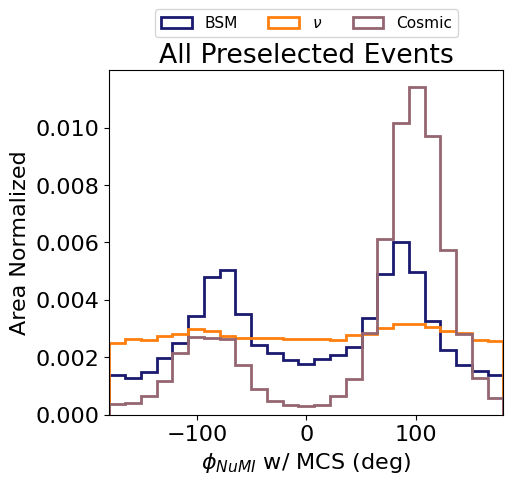

In [23]:
# PHI_NUMI
saveplots=False
makeplot(evtdf, evtdf.phi_NuMI_mcs*180./math.pi,
         (-180,180.), 
         xlabel = "$\\phi_{NuMI}$ w/ MCS (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='phi_NuMI',
         density=True,
         logy=False,
         #vline=[nom_NuMI_angle_thresh, NuMI_angle_thresh], #[79.2, 86.4], #nom_NuMI_angle_thresh
         title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False
        )

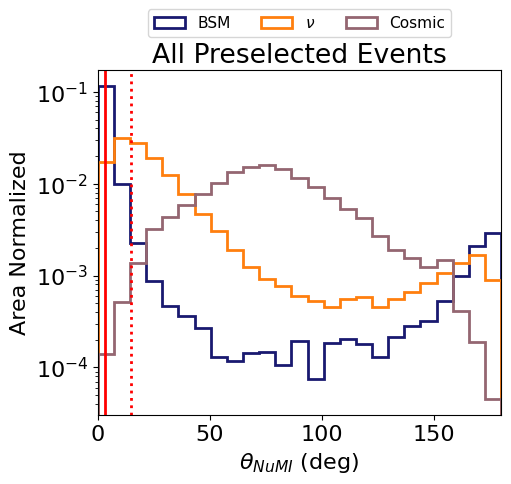

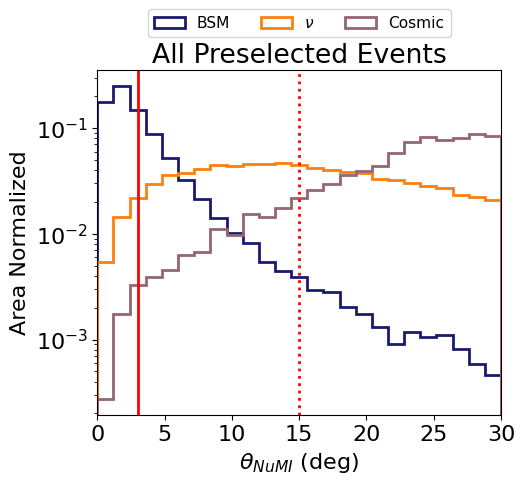

In [37]:
# THETA_NUMI

# Plot in uncontained_mus.ipynb shows that mcs track momentum determination is best thing to use to get this angle for uncontained muons.
# Here, see how that does compared to background.

makeplot(evtdf, evtdf.Snumi_angle_mcs*180./math.pi,
         (0,180.), 
         xlabel = "$\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI',
         density=True,
         logy=True,
         vline=[nom_NuMI_angle_thresh, NuMI_angle_thresh], #[79.2, 86.4], #nom_NuMI_angle_thresh
         title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False
        )
makeplot(evtdf, evtdf.Snumi_angle_mcs*180./math.pi,
         (0,30.), 
         xlabel = "$\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_zoom',
         density=True,
         logy=True,
         vline=[nom_NuMI_angle_thresh, NuMI_angle_thresh], #[79.2, 86.4], #nom_NuMI_angle_thresh
         title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False
        )
#makeplot(evtdf, evtdf.Snumi_angle_mcs*180./math.pi,
#         (0,180.), xlabel = "$\\theta_{NuMI}$ (deg)",
#         bins = 25,
#         detailed_bsm=False, #True,
#         detailed_nu='none', # int_type, none
#         hps_final_state=False,
#         plotname='noname', density=False,
#         logy=True, vline=[], title='All Preselected Events', categories='int_type')

#makeplot(evtdf, evtdf.Snumi_angle_mcs*180./math.pi,
#         (0,180.), xlabel = "$\\theta_{NuMI}$ (deg)",
#         bins = 25,
#         detailed_bsm=False, #True,
#         detailed_nu='none', # int_type
#         hps_final_state=False,
#         plotname='noname', density=False,
#         logy=True,
#         #vline=weird_bin_boundaries,
#         title='All Preselected Events', categories='int_type')

#makeplot(evtdf, evtdf.Snumi_angle_mcs*180./math.pi,
#         (0,180.), xlabel = "$\\theta_{NuMI}$ (deg)",
#         bins = 25,
#         detailed_bsm=False, #True,
#         detailed_nu='none', # int_type
#         hps_final_state=False,
#         plotname='noname', density=True,
#         logy=True, vline=[], title='All Preselected Events', categories='vtx')
#makeplot(evtdf, evtdf.Snumi_angle_mcs*180./math.pi,
#         (0,180.), xlabel = "$\\theta_{NuMI}$ (deg)",
#         bins = 25,
#         detailed_bsm=False, #True,
#         detailed_nu='none', # int_type
#         hps_final_state=False,
#         plotname='noname', density=False,
#         logy=True, vline=[], title='All Preselected Events', categories='vtx')#

# n-1

#full_cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
#            max_shw_len_mask, ok_chi2mu, ok_chi2p,
#           numi_angle_mask, open_angle_mask, shortTrk_len_mask]
#cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
#            max_shw_len_mask, ok_chi2mu, ok_chi2p,
#            open_angle_mask, shortTrk_len_mask]

#cut_results = apply_cuts(evtdf, cut_list, detailed_bsm=True, detailed_nu='none', flip_last_cut=False)
#mask = cut_results[-1]
#mc_res = cut_results[0]
#pot_res = cut_results[1]
#percent_res = cut_results[2]
#final_df = add_hdr_info(evtdf[mask], hdrs)
#
#makeplot(final_df, final_df.Snumi_angle_mcs*180./math.pi,
#         (0,180.), xlabel = "$\\theta_{NuMI}$ (deg)",
#         bins = 25,
#         detailed_bsm=False,
#         detailed_nu='none', # int_type
#         hps_final_state=False,
#         plotname='noname', density=False,
#         logy=True, vline=[], title='Sample w/ n-1 Cuts', categories='vtx')

#makeplot(final_df, final_df.Snumi_angle_mcs*180./math.pi,
#         (0,180.), xlabel = "$\\theta_{NuMI}$ (deg)",
#         bins = 25,
#         detailed_bsm=False,
#         detailed_nu='none', # int_type
#         hps_final_state=False,
#         plotname='noname', density=False,
#         logy=True, vline=[], title='Sample w/ n-1 Cuts')

In [43]:
for c in evtdf.columns: print(c)

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 'momentum', 'x', '', '')
('slc', 'truth', 'momentum', 'y', '', '')
('slc', 'truth', 'momentum', 'z', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'parent_pdg', '', '', '')
('slc', 'truth', 'parent_dc

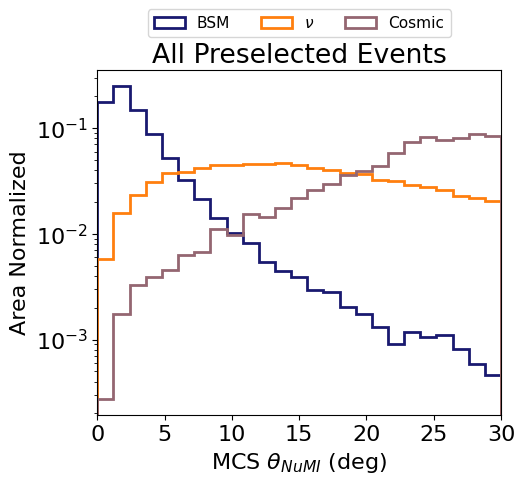

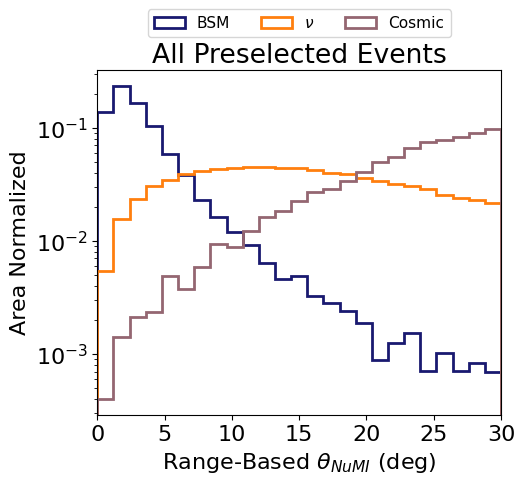

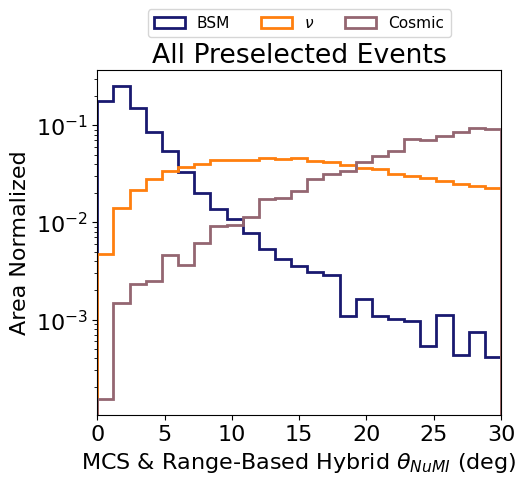

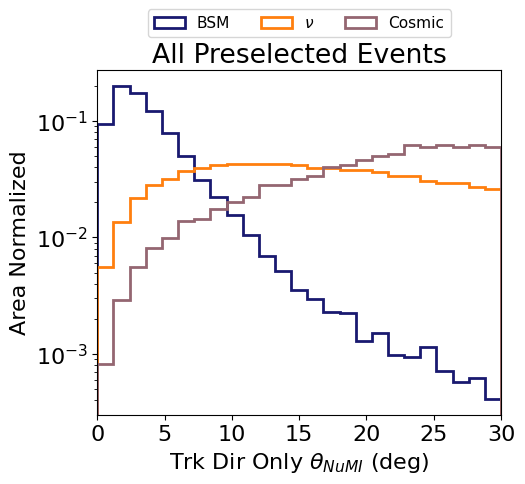

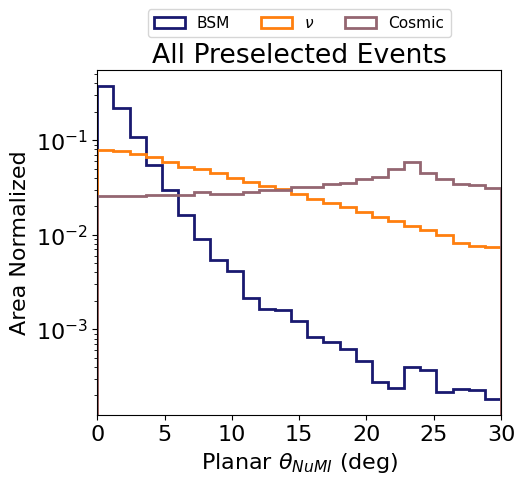

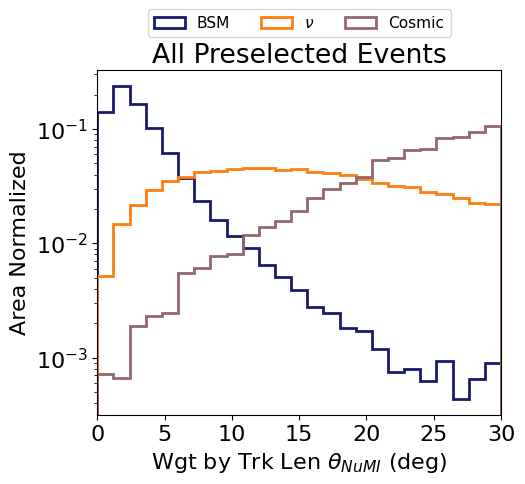

In [24]:
# theta_NuMI - COMPARE METHODS

myRange = (0,30)

makeplot(evtdf, evtdf.Snumi_angle_mcs*180./math.pi,
         myRange, 
         xlabel = "MCS $\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=True,
         logy=True,
         title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False
        )

makeplot(evtdf, evtdf.Snumi_angle_rangeBased*180./math.pi,
         myRange, 
         xlabel = "Range-Based $\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=True,
         logy=True,
         title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False
        )

makeplot(evtdf, evtdf.Snumi_angle_hybrid_rangeMCS*180./math.pi,
         myRange, 
         xlabel = "MCS & Range-Based Hybrid $\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=True,
         logy=True,
         title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False
        )

makeplot(evtdf, evtdf.Snumi_angle_trkDirOnly*180./math.pi,
         myRange, 
         xlabel = "Trk Dir Only $\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=True,
         logy=True,
         title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False
        )

makeplot(evtdf, evtdf.Snumi_angle_planar*180./math.pi,
         myRange, 
         xlabel = "Planar $\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=True,
         logy=True,
         title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False
        )

makeplot(evtdf, evtdf.Snumi_angle_wgtByLen*180./math.pi,
         myRange, 
         xlabel = "Wgt by Trk Len $\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=True,
         logy=True,
         title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False
        )

/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


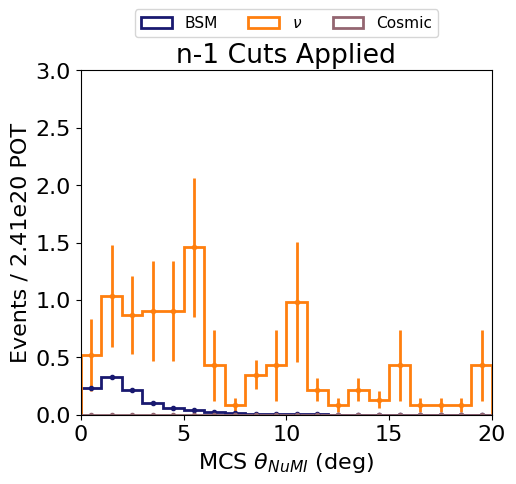

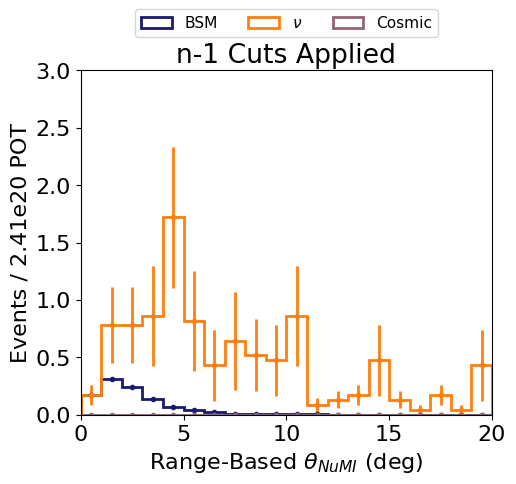

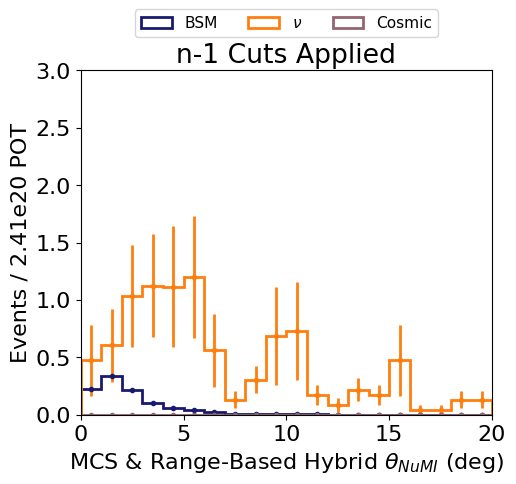

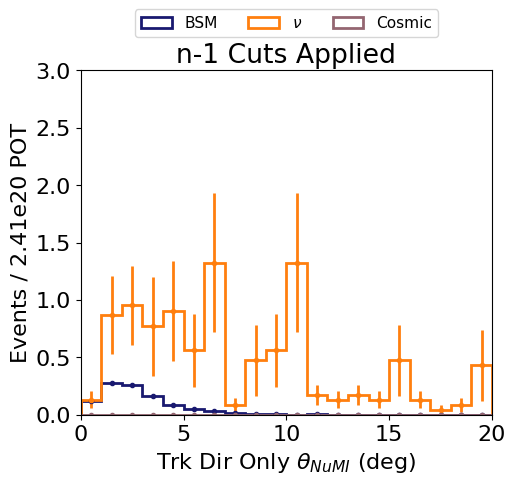

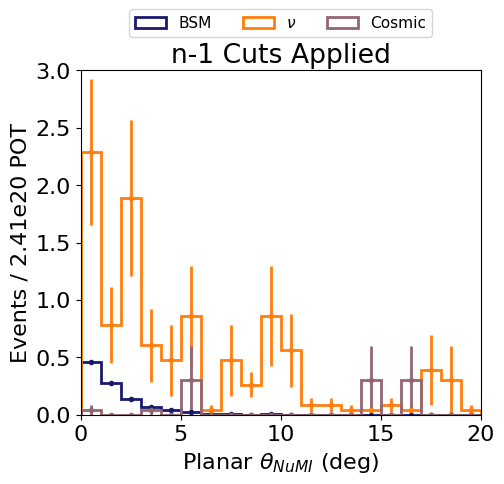

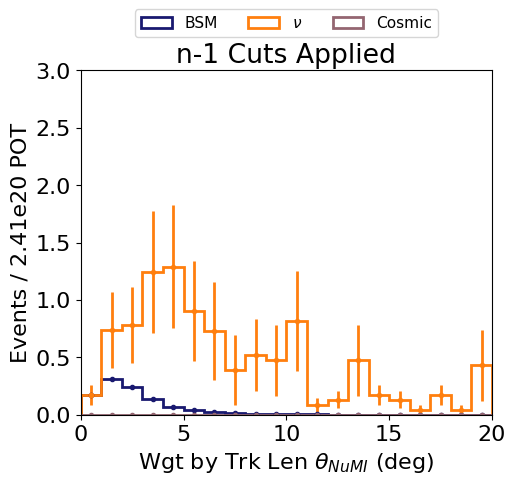

In [66]:
# theta_NuMI COMPARE METHODS: n-1 cuts applied

nminus1_cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask,
            ok_chi2mu, ok_chi2p,
            open_angle_mask, 
            shortTrk_len_mask
           ]
nminus1_opt_thresholds = [
    stub_dedx_l0_5cm_thresh, stub_dedx_l1cm_thresh, stub_dedx_l2cm_thresh, stub_dedx_l3cm_thresh,
    max_shw_len_thresh,
    chi2_mu_forMuons, chi2_p_forMuons,
    open_angle_thresh,
    trk_len_thresh
]

cut_results = apply_cuts(evtdf, nminus1_cut_list, thresholds=nminus1_opt_thresholds, 
                         detailed_bsm=True, detailed_nu='none', flip_last_cut=False)
#cut_results = apply_cuts(evtdf, cut_list_noTrkLenCut, detailed_hps=True, flip_last_cut=False)
mask = cut_results[-1]
mc_res = cut_results[0]
pot_res = cut_results[1]
percent_res = cut_results[2]
#final_df = add_hdr_info(evtdf)
nminus1_df = add_hdr_info(evtdf[mask], hdrs)

myRange = (0,20)
myDensity = False
logy = False
mybins = 20 #25

makeplot(nminus1_df, nminus1_df.Snumi_angle_mcs*180./math.pi,
         myRange, 
         xlabel = "MCS $\\theta_{NuMI}$ (deg)",
         bins = mybins,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=myDensity,
         logy=logy,
         title='n-1 Cuts Applied',
         #title='All Preselected Events',title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False,
         do_stat_err = True
        )

makeplot(nminus1_df, nminus1_df.Snumi_angle_rangeBased*180./math.pi,
         myRange, 
         xlabel = "Range-Based $\\theta_{NuMI}$ (deg)",
         bins = mybins,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=myDensity,
         logy=logy,
         title='n-1 Cuts Applied',
         #title='All Preselected Events',title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False,
         do_stat_err = True
        )

makeplot(nminus1_df, nminus1_df.Snumi_angle_hybrid_rangeMCS*180./math.pi,
         myRange, 
         xlabel = "MCS & Range-Based Hybrid $\\theta_{NuMI}$ (deg)",
         bins = mybins,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=myDensity,
         logy=logy,
         title='n-1 Cuts Applied',
         #title='All Preselected Events',title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False,
         do_stat_err = True
        )

makeplot(nminus1_df, nminus1_df.Snumi_angle_trkDirOnly*180./math.pi,
         myRange, 
         xlabel = "Trk Dir Only $\\theta_{NuMI}$ (deg)",
         bins = mybins,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=myDensity,
         logy=logy,
         title='n-1 Cuts Applied',
         #title='All Preselected Events',title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False,
         do_stat_err = True
        )

makeplot(nminus1_df, nminus1_df.Snumi_angle_planar*180./math.pi,
         myRange, 
         xlabel = "Planar $\\theta_{NuMI}$ (deg)",
         bins = mybins,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=myDensity,
         logy=logy,
         title='n-1 Cuts Applied',
         #title='All Preselected Events',title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False,
         do_stat_err = True
        )

makeplot(nminus1_df, nminus1_df.Snumi_angle_wgtByLen*180./math.pi,
         myRange, 
         xlabel = "Wgt by Trk Len $\\theta_{NuMI}$ (deg)",
         bins = mybins,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type, none
         hps_final_state=False,
         plotname='theta_NuMI_MCS',
         density=myDensity,
         logy=logy,
         title='n-1 Cuts Applied',
         #title='All Preselected Events',
         categories='int_type',
         apply_cv_weights = False,
         do_stat_err = True
        )

In [28]:
for c in evtdf.columns: print(c)

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 'momentum', 'x', '', '')
('slc', 'truth', 'momentum', 'y', '', '')
('slc', 'truth', 'momentum', 'z', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'parent_pdg', '', '', '')
('slc', 'truth', 'parent_dc

In [ ]:
# TO DO:
# What's in the "other" category?
# For the vtx category plots: are we sure the trunk and track correspond to different particles? (Check the g4ID.)

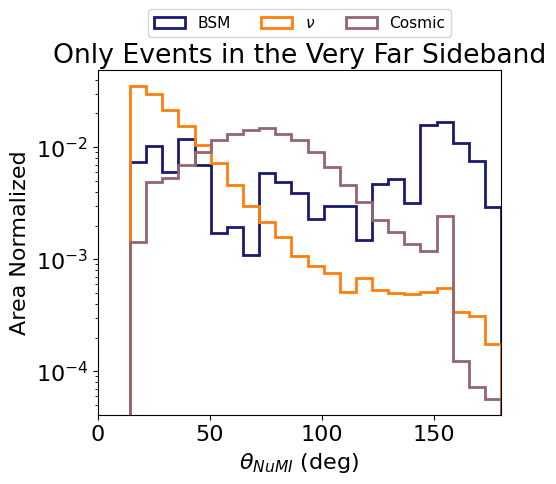

(27485, 271)
(3623, 271)


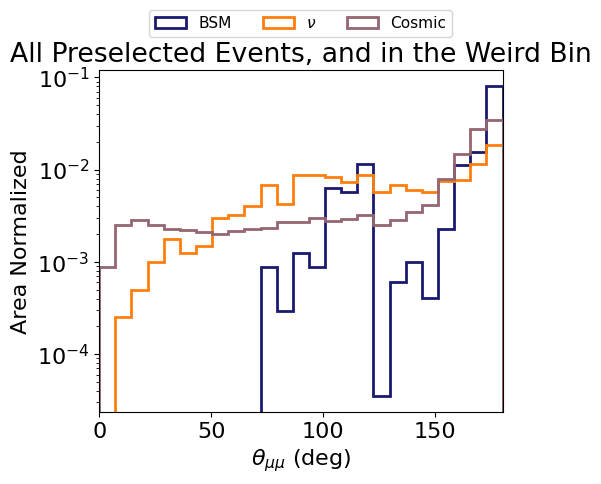

(27485, 271)
any category (i.e. everything): 
same:  19754
diff:  7731

BSM
same:  87
diff:  37

$\nu$
same:  160
diff:  394

Cosmic
same:  19420
diff:  6961



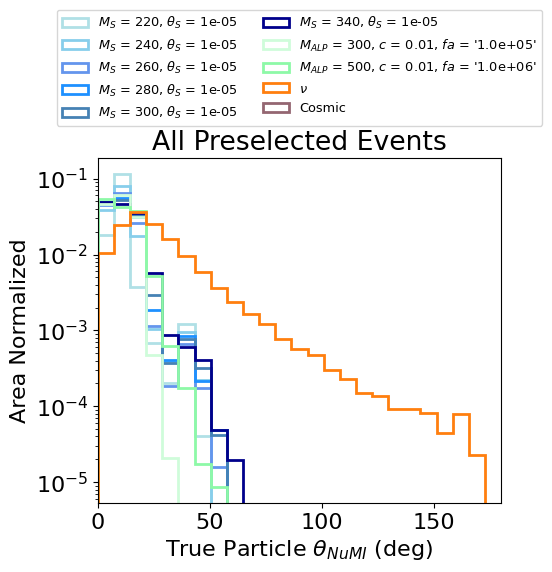

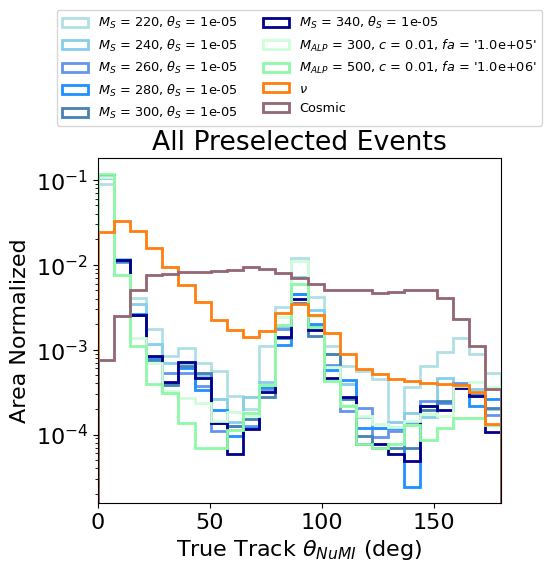

In [97]:
# AN ANNOYING BUT NECESSARY TANGENT:
# WHAT IS WITH THAT BUMP IN THE SIGNAL AT ~85 DEGREES? DOES IT MATCH WHAT I SEE IN FAR SIDEBAND DATA?

# REPLOT FOR ONLY FAR SIDEBAND:

# Define Very Far Sideband

fsb_NuMI_angle_thresh = 15 # deg # Very Far Sideband I presented in 2023: > 0.15 rad # Use for selection: < 0.05 rad
fsb_open_angle_thresh = [70,115]# Use for selection: < 0.35 rad 
def sb_numi_angle_mask(df, thresh = fsb_NuMI_angle_thresh): # do calculation in radians. User uses degrees.
    return df.Snumi_angle_mcs > thresh*math.pi/180., 'S_NuMI_angle > '+str(thresh)+' deg'#'\u00B0'
def sb_open_angle_mask(df, thresh = fsb_open_angle_thresh):
    return ( ( (np.arccos(dotdf(df.trunk.trk.dir, df.branch.trk.dir)) > thresh[0]*math.pi/180.) & 
            (np.arccos(dotdf(df.trunk.trk.dir, df.branch.trk.dir)) < thresh[1]*math.pi/180.) ), 
            str(thresh[0])+' deg < opening angle < '+str(thresh[1])+' deg')
sideband_mask = sb_numi_angle_mask(evtdf)[0] & sb_open_angle_mask(evtdf)[0]
fsb_evtdf = evtdf[sideband_mask]

# Make the plot

makeplot(fsb_evtdf, fsb_evtdf.Snumi_angle_mcs*180./math.pi,
         (0,180.), xlabel = "$\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='noname',
         density=True,
         categories='int_type',
         logy=True, vline=[], title='Only Events in the Very Far Sideband',
         apply_cv_weights = False
        )

# Well that's weird: the bump in weird bin disappeared. (It's weird that we see it in data in far sideband though... hmmmmmm)
# So anyway, what are the opening angles of those events?

weird_bin_boundaries = [79.19999695, 86.40000153]
def in_weird_bin_mask(df, bin_boundaries = weird_bin_boundaries):
    return ((df.Snumi_angle_mcs*180/math.pi > bin_boundaries[0]) & (df.Snumi_angle_mcs*180/math.pi < bin_boundaries[1]))
print(evtdf[in_weird_bin_mask(evtdf)].shape)
print(fsb_evtdf[in_weird_bin_mask(fsb_evtdf)].shape)
makeplot(#fsb_evtdf[in_weird_bin_mask(fsb_evtdf)], 
         #np.arccos(dotdf(fsb_evtdf[in_weird_bin_mask(fsb_evtdf)].trunk.trk.dir, fsb_evtdf[in_weird_bin_mask(fsb_evtdf)].branch.trk.dir))*180./math.pi,
         evtdf[in_weird_bin_mask(evtdf)], 
         np.arccos(dotdf(evtdf[in_weird_bin_mask(evtdf)].trunk.trk.dir, evtdf[in_weird_bin_mask(evtdf)].branch.trk.dir))*180./math.pi,
         (0,180.), xlabel = "$\\theta_{\mu\mu}$ (deg)",
         bins = 25,
         detailed_bsm=False, #True,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='noname', 
         density=True,
         logy=True, vline=[],
         #title='Only Events in the Very Far Sideband, \n and in the Weird Bin',
         title='All Preselected Events, and in the Weird Bin',
         categories='int_type',
         apply_cv_weights = False
        )

## DO TRACKS OF EVENTS IN THE WEIRD BIN HAVE UNIQUE G4ID VALUES, OR ARE THEY ACTUALLY WRONGLY TWO TRACKS FOR THE SAME PARTICLE?
## ANSWER: THEY USUALLY HAVE THE SAME G4IDs!!!
weirdBin_df = evtdf[in_weird_bin_mask(evtdf)]
print(weirdBin_df.shape)
same = 0
diff = 0
for i in range(weirdBin_df.shape[0]):
    if int(weirdBin_df.iloc[i].trunk.trk.truth.p.G4ID) == int(weirdBin_df.iloc[i].branch.trk.truth.p.G4ID):
        same = same + 1
    else:
        diff = diff + 1
print('any category (i.e. everything): ')
print('same: ', same)
print('diff: ', diff)
print('')


for c in make_categories(weirdBin_df):
    print(c.name)
    df = weirdBin_df[c]
    same = 0
    diff = 0
    for i in range(df.shape[0]):
        if int(df.iloc[i].trunk.trk.truth.p.G4ID) == int(df.iloc[i].branch.trk.truth.p.G4ID):
            same = same + 1
        else:
            diff = diff + 1
    print('same: ', same)
    print('diff: ', diff)
    print('')

# PLOT TRUE THETA_NUMI

makeplot(evtdf, evtdf.Snumi_angle_trueParticle*180./math.pi,
         (0,180.), xlabel = "True Particle $\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=True, #True,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='noname', 
         density=True,
         logy=True, vline=[], title='All Preselected Events', categories='int_type',
         apply_cv_weights = False)

makeplot(evtdf, evtdf.Snumi_angle_trueTrk*180./math.pi,
         (0,180.), xlabel = "True Track $\\theta_{NuMI}$ (deg)",
         bins = 25,
         detailed_bsm=True, #True,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='noname', 
         density=True,
         logy=True, vline=[], title='All Preselected Events', categories='int_type',
         apply_cv_weights = False)


In [99]:
# BSM:
print(87./(87+37))

# nu:
print(160./(160+394))

# cosmic:
print(19420./(19420+6961))

0.7016129032258065
0.2888086642599278
0.7361358553504416


30


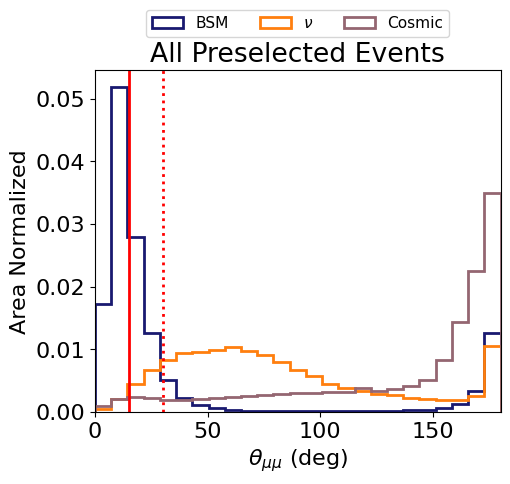

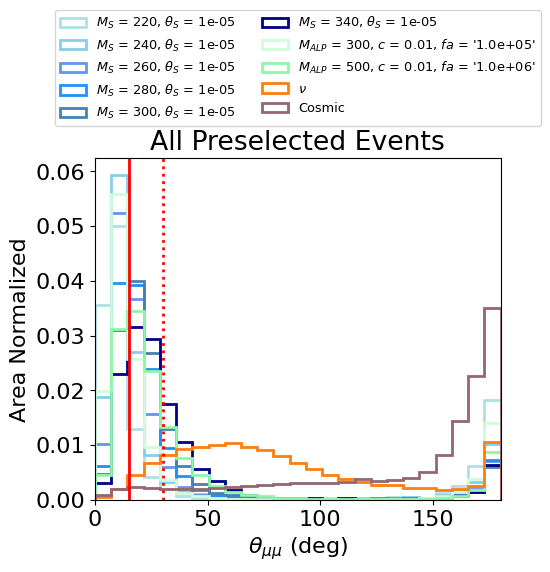

In [66]:
# OPENING ANGLE

print(nom_open_angle_thresh)

makeplot(evtdf,
         np.arccos(dotdf(evtdf.trunk.trk.dir, evtdf.branch.trk.dir))*180./math.pi,
         (0,180.),
         xlabel = "$\\theta_{\mu\mu}$ (deg)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='openangle', density=True,
         logy=False, 
         vline=[nom_open_angle_thresh, open_angle_thresh], 
         title='All Preselected Events',
         apply_cv_weights = False
        )

makeplot(evtdf,
         np.arccos(dotdf(evtdf.trunk.trk.dir, evtdf.branch.trk.dir))*180./math.pi,
         (0,180.),
         xlabel = "$\\theta_{\mu\mu}$ (deg)",
         bins = 25,
         detailed_bsm=True,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='openangle_detailed_bsm', density=True,
         logy=False, 
         vline=[nom_open_angle_thresh, open_angle_thresh], 
         title='All Preselected Events',
         apply_cv_weights = False
        )

/tmp/ipykernel_24103/3831112880.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var[np.isnan(var) | (var < 0)] = -10


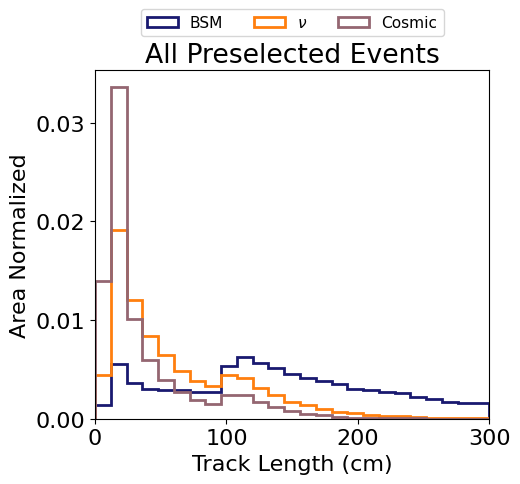

In [64]:
# TRACK LENGTH

makeplot(evtdf,
         evtdf.shorter_track_length,
         (0,300),
         xlabel = "Track Length (cm)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='shorter_trklen', density=True,
         logy=False, 
         vline=[], title='All Preselected Events',
         apply_cv_weights = False
        )

70
40
25
20


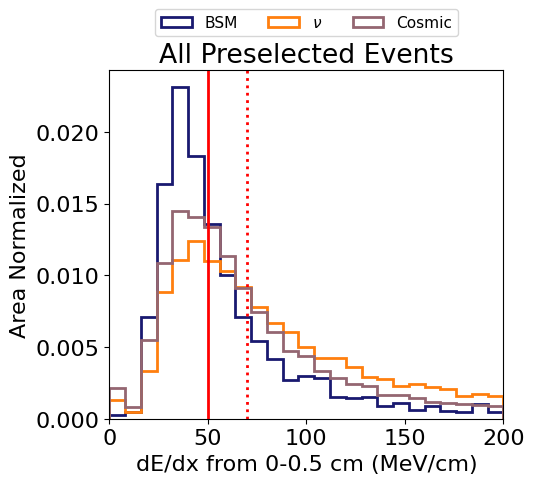

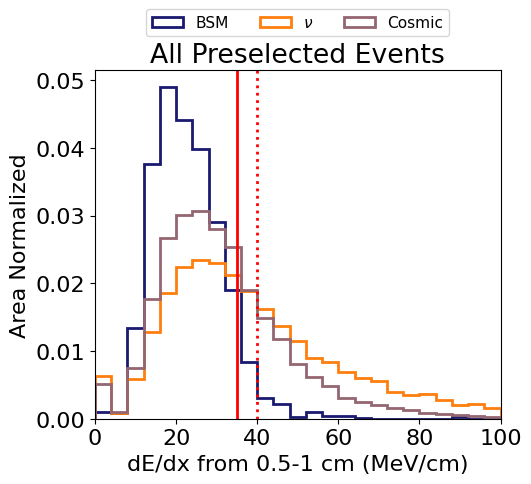

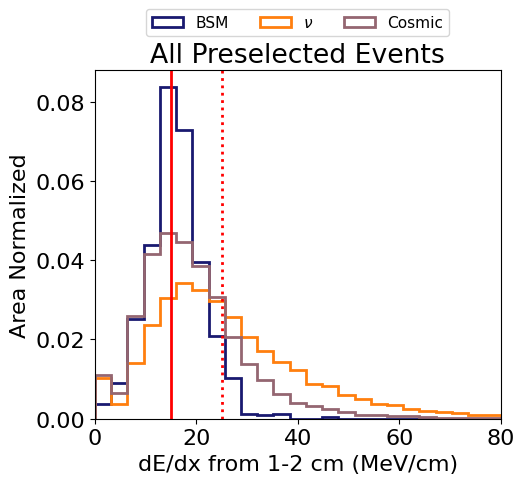

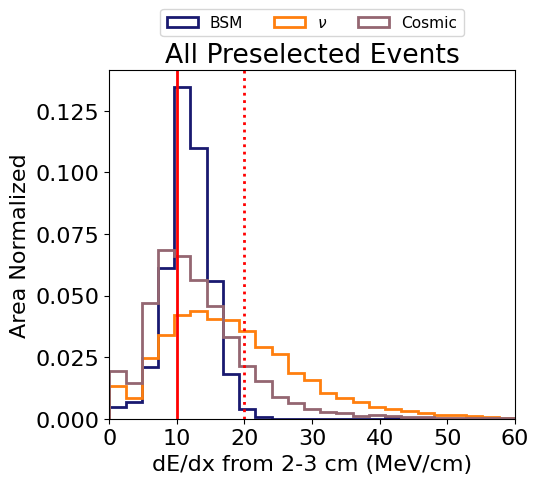

In [49]:
# dE/dx
detailed_bsm=False
detailed_nu='none'
hps_final_state=False
density=True,
logy=False
bins=25
title='All Preselected Events'

print(nom_stub_dedx_l0_5cm_thresh)
print(nom_stub_dedx_l1cm_thresh)
print(nom_stub_dedx_l2cm_thresh)
print(nom_stub_dedx_l3cm_thresh)

makeplot(evtdf,
         evtdf.stub.l0_5cm.dedx,
         (0,200),
         xlabel = 'dE/dx from 0-0.5 cm (MeV/cm)',
         plotname='dEdx_0to0o5',
         vline=[nom_stub_dedx_l0_5cm_thresh, stub_dedx_l0_5cm_thresh],
         detailed_bsm=detailed_bsm, detailed_nu=detailed_nu, hps_final_state=hps_final_state, 
         density=density, logy=logy, bins=bins, title=title,
         apply_cv_weights = False
        )
makeplot(evtdf,
         evtdf.stub.l1cm.dedx,
         (0,100),
         xlabel = 'dE/dx from 0.5-1 cm (MeV/cm)',
         plotname='dEdx_0o5to1', 
         vline=[nom_stub_dedx_l1cm_thresh, stub_dedx_l1cm_thresh],
         detailed_bsm=detailed_bsm, detailed_nu=detailed_nu, hps_final_state=hps_final_state, 
         density=density, logy=logy, bins=bins, title=title,
         apply_cv_weights = False
        )

makeplot(evtdf,
         evtdf.stub.l2cm.dedx,
         (0,80),
         xlabel = 'dE/dx from 1-2 cm (MeV/cm)',
         plotname='dEdx_1to2',
         vline=[nom_stub_dedx_l2cm_thresh, stub_dedx_l2cm_thresh],
         detailed_bsm=detailed_bsm, detailed_nu=detailed_nu, hps_final_state=hps_final_state, 
         density=density, logy=logy, bins=bins, title=title,
         apply_cv_weights = False
        )
makeplot(evtdf,
         evtdf.stub.l3cm.dedx,
         (0,60),
         xlabel = 'dE/dx from 2-3 cm (MeV/cm)',
         plotname='dEdx_2to3',
         vline=[nom_stub_dedx_l3cm_thresh, stub_dedx_l3cm_thresh],
         detailed_bsm=detailed_bsm, detailed_nu=detailed_nu, hps_final_state=hps_final_state, 
         density=density, logy=logy, bins=bins, title=title,
         apply_cv_weights = False
        )

20.0


/tmp/ipykernel_24103/3831112880.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var[np.isnan(var) | (var < 0)] = -10


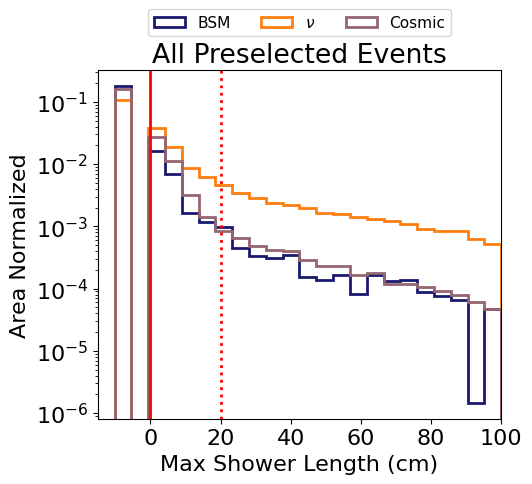

In [51]:
# MAX SHOWER LENGTH

print(nom_max_shw_len_thresh)

makeplot(evtdf,
         evtdf.max_shw_len,
         (-15,100),
         xlabel = "Max Shower Length (cm)",
         bins = 24,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='maxShwLen', density=True,
         logy=True, 
         vline=[nom_max_shw_len_thresh, max_shw_len_thresh], 
         title='All Preselected Events',
         apply_cv_weights=False
        )

20


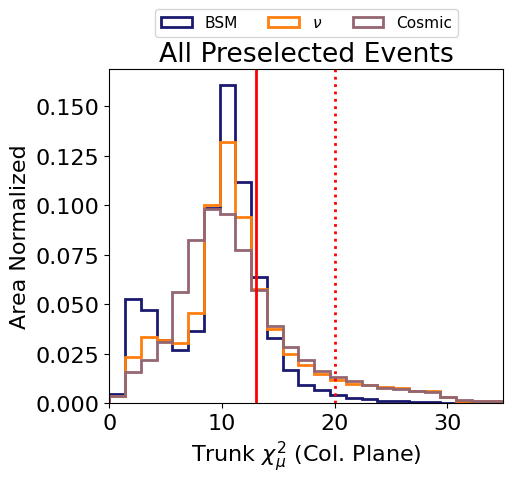

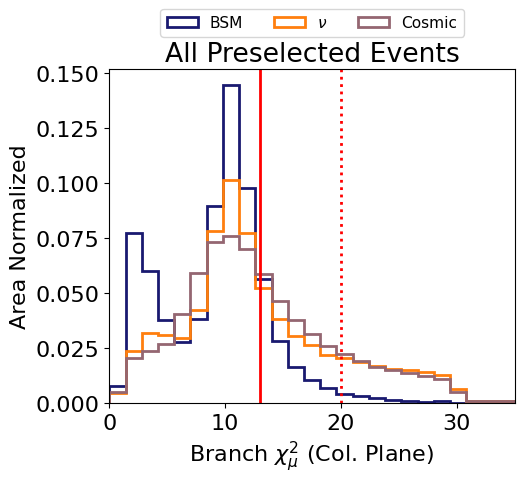

In [62]:
# PID CHI2 MU

print(nom_chi2_mu_forMuons)
myrange = (0,35)

makeplot(evtdf,
         evtdf.trunk.trk.chi2pid.I2.chi2_muon,
         myrange,
         xlabel = "Trunk $\\chi^2_\\mu$ (Col. Plane)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='pid_mu_trunk', density=True,
         logy=False, 
         vline=[nom_chi2_mu_forMuons, chi2_mu_forMuons], 
         title='All Preselected Events',
         apply_cv_weights=False
        )
makeplot(evtdf,
         evtdf.branch.trk.chi2pid.I2.chi2_muon,
         myrange,
         xlabel = "Branch $\\chi^2_\\mu$ (Col. Plane)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='pid_mu_branch', density=True,
         logy=False, 
         vline=[nom_chi2_mu_forMuons, chi2_mu_forMuons], 
         title='All Preselected Events',
         apply_cv_weights=False
        )

100


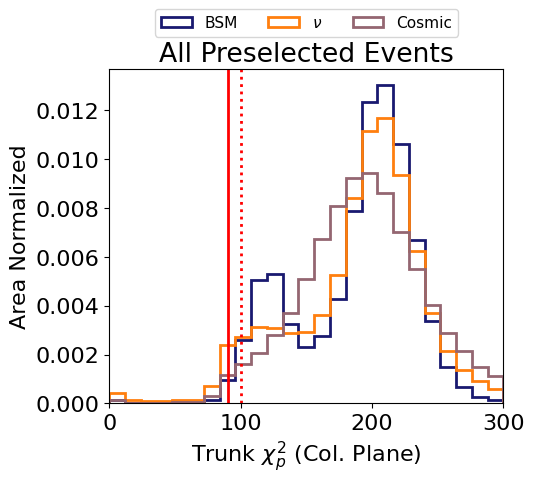

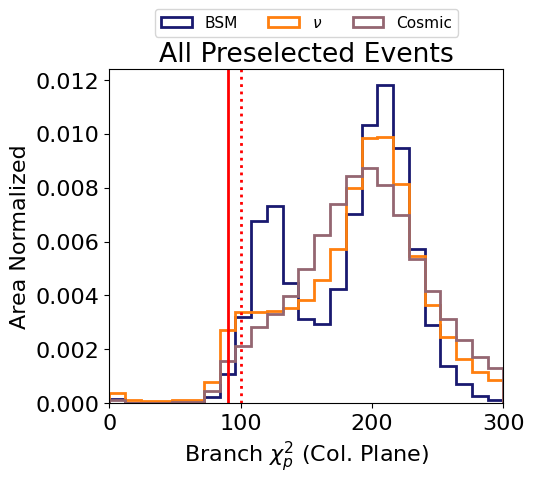

In [61]:
# PID CHI2 p

print(nom_chi2_p_forMuons)
myrange=(0,300)

makeplot(evtdf,
         evtdf.trunk.trk.chi2pid.I2.chi2_proton,
         myrange,
         xlabel = "Trunk $\\chi^2_p$ (Col. Plane)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='pid_p_trunk', density=True,
         logy=False, 
         vline=[nom_chi2_p_forMuons, chi2_p_forMuons], 
         title='All Preselected Events',
         apply_cv_weights=False
        )
makeplot(evtdf,
         evtdf.branch.trk.chi2pid.I2.chi2_proton,
         myrange,
         xlabel = "Branch $\\chi^2_p$ (Col. Plane)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='pid_p_branch', density=True,
         logy=False, 
         vline=[nom_chi2_p_forMuons, chi2_p_forMuons], 
         title='All Preselected Events',
         apply_cv_weights=False
        )

### chi2pid (goes into 'ismuon' check)

KEEP THIS ONE! 
Useful because...
- combines trunk and branch into just "tracks"
- plots muons and proton scores side by side.

In [82]:
def plot_chi2(df, vline_mu = None, vline_p = None, bsm=False, detailed_nu=False,
                  density=True, POTSTR=POTSTR, sample_description=""):
    if bsm == True:
        categories = make_categories(df, bsm=True)
    elif detailed_nu == True:
        categories = make_categories(df, detailed_nu=True)
    else:
        categories = make_categories(df)
        
    plt.figure(figsize=(10.9,3))
    scale = df.scale.copy()
    
    # Muon Scores
    
    bins=np.linspace(0, 100, 31)
    plt.subplot(1,2,1)
    my_vars = [df.trunk.trk.chi2pid.I2.chi2_muon, df.branch.trk.chi2pid.I2.chi2_muon]
    for c in categories:
        _ = plt.hist(np.concatenate((my_vars[0][c], my_vars[1][c])),
                     weights=np.concatenate((scale[c],scale[c])), 
                     bins=bins, label=c.name, color=c.color,
                     histtype="step", linewidth=2, density=True)
    #plt.legend(loc='upper right')
    plt.xlim((0,100))
    plt.xlabel(" $\\chi^2$ Muon (Col. Plane)")
    if density:
        plt.ylabel("Area Normalized")
    else:
        plt.ylabel("Candidates / %s" % POTSTR)
    plt.yscale("log")
    if vline_mu is not None:
        plt.axvline([vline_mu], linestyle=":", color="r", linewidth=2)
    #plt.title("ICARUS MC"+sample_description)
    
    # Proton Scores
    
    bins=np.linspace(0, 400, 31)
    plt.subplot(1,2,2)
    
    my_vars = [df.trunk.trk.chi2pid.I2.chi2_proton, df.branch.trk.chi2pid.I2.chi2_proton]
    for c in categories:
        _ = plt.hist(np.concatenate((my_vars[0][c], my_vars[1][c])), 
                     weights=np.concatenate((scale[c],scale[c])), 
                     bins=bins, label=c.name, color=c.color,
                     histtype="step", linewidth=2, density=True)
    #plt.legend()
    plt.xlim((0,400))
    plt.xlabel(" $\\chi^2$ Proton (Col. Plane)")
    #if density:
    #    plt.ylabel("Area Normalized")
    #else:
    #    plt.ylabel("Candidates / %s" % POTSTR)
    plt.yscale("log")
    if vline_p is not None:
        plt.axvline([vline_p], linestyle=":", color="r", linewidth=2)
    #plt.title("ICARUS MC"+sample_description)
    
    # General
    plt.show()
plot_chi2(evtdf, vline_mu = chi2_mu_forMuons, vline_p = chi2_p_forMuons, bsm=True, detailed_nu=False)  

TypeError: make_categories() got an unexpected keyword argument 'bsm'

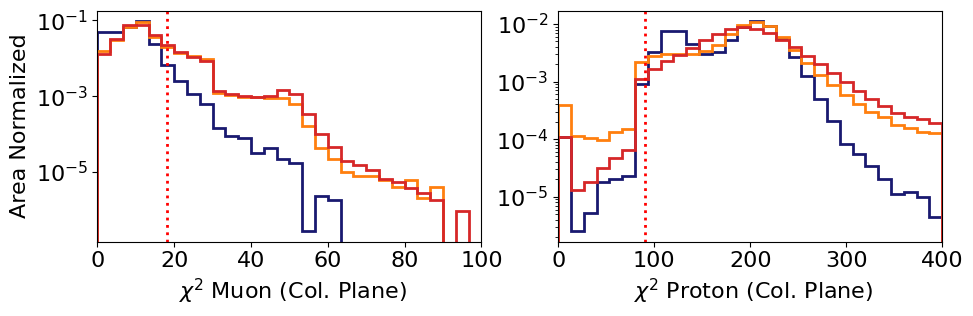

In [41]:
plot_chi2(evtdf, vline_mu = chi2_mu_forMuons, vline_p = chi2_p_forMuons, bsm=True, detailed_nu=False)

In [32]:
for c in evtdf.columns:
    print(c)

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 'momentum', 'x', '', '')
('slc', 'truth', 'momentum', 'y', '', '')
('slc', 'truth', 'momentum', 'z', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'parent_pdg', '', '', '')
('slc', 'truth', 'parent_dc

140.0
10.0000581741333, 790.8091430664062


/tmp/ipykernel_26742/2899542911.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var[np.isnan(var) | (var < 0)] = -10


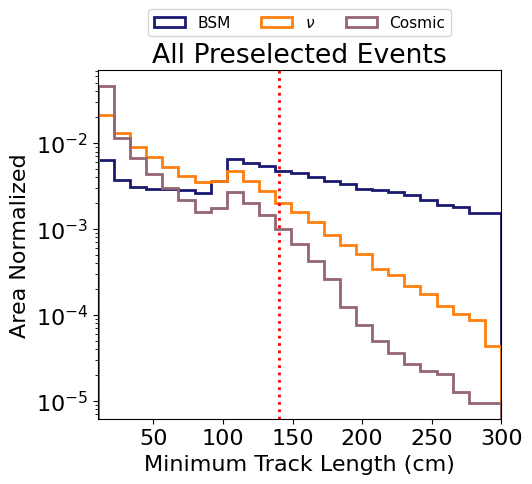

/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_26742/2899542911.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var[np.isnan(var) | (var < 0)] = -10


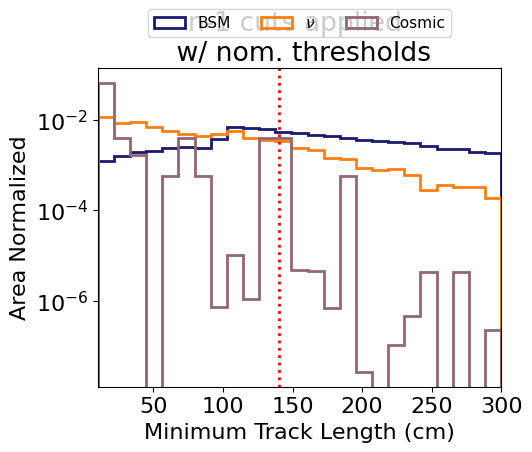

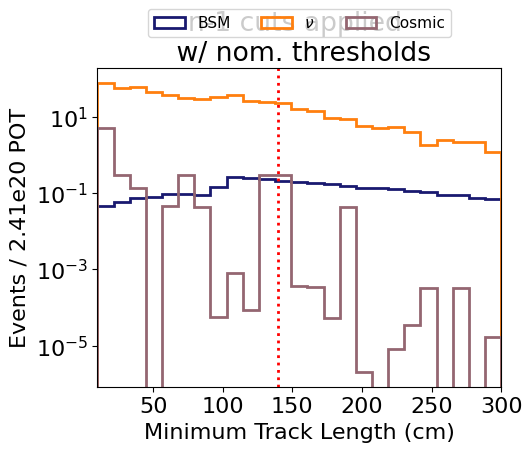

/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_26742/2899542911.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var[np.isnan(var) | (var < 0)] = -10


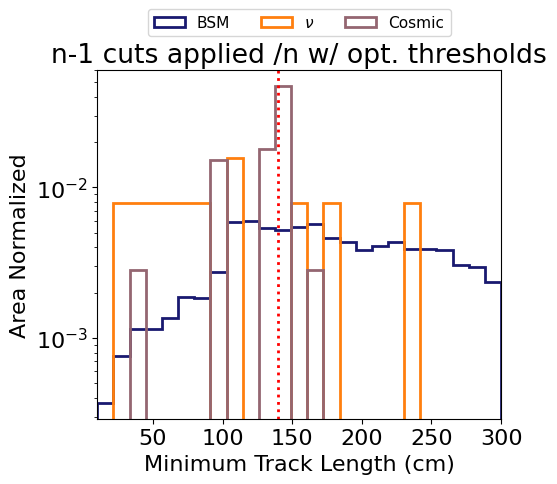

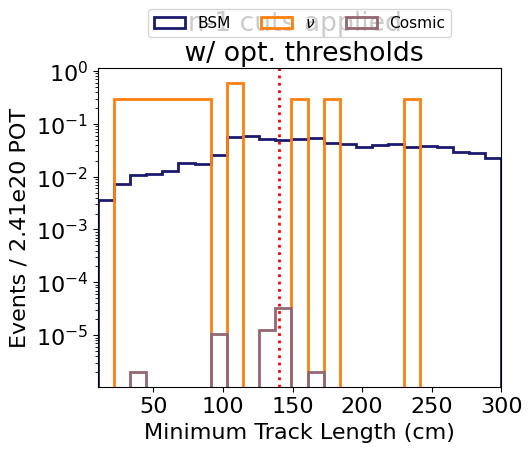

In [40]:
# Track Length Cut

print(nom_trk_len_thresh)
print(min(evtdf.shorter_track_length), max(evtdf.shorter_track_length), sep=', ')

# all preselected events

makeplot(evtdf,
         evtdf.shorter_track_length,
         (10,300),
         xlabel = "Minimum Track Length (cm)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', 
         hps_final_state=False,
         plotname='noname', density=True,
         logy=True, 
         vline=[nom_trk_len_thresh], 
         title='All Preselected Events',
         apply_cv_weights = False)

# n-1 cuts 

cut_list_noTrkLenCut = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
nom_thresholds_noTrkLenCut = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]

opt_thresholds_noTrkLenCut = [
    50., 35., 15., 10.,
    0.,
    13., 90.,
    3., 15.
]

# ... with nominal cut thresholds

cut_results = apply_cuts(evtdf, cut_list_noTrkLenCut, thresholds=nom_thresholds_noTrkLenCut, 
                         detailed_bsm=True, detailed_nu='none', flip_last_cut=False)
nom_mask = cut_results[-1]
nom_mc_res = cut_results[0]
nom_pot_res = cut_results[1]
nom_percent_res = cut_results[2]
#final_df = add_hdr_info(evtdf)
nom_final_df = add_hdr_info(evtdf[nom_mask], hdrs)

makeplot(nom_final_df,
         nom_final_df.shorter_track_length,
         (10,300),
         xlabel = "Minimum Track Length (cm)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', 
         hps_final_state=False,
         plotname='noname', density=True,
         logy=True, 
         vline=[nom_trk_len_thresh], 
         title='n-1 cuts applied \n w/ nom. thresholds',
         apply_cv_weights = False)

makeplot(nom_final_df,
         nom_final_df.shorter_track_length,
         (10,300),
         xlabel = "Minimum Track Length (cm)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', 
         hps_final_state=False,
         plotname='noname', density=False,
         logy=True, 
         vline=[nom_trk_len_thresh], 
         title='n-1 cuts applied \n w/ nom. thresholds',
         apply_cv_weights = False)

# ... with optimized cut thresholds

cut_results = apply_cuts(evtdf, cut_list_noTrkLenCut, thresholds=opt_thresholds_noTrkLenCut, 
                         detailed_bsm=True, detailed_nu='none', flip_last_cut=False)
opt_mask = cut_results[-1]
opt_mc_res = cut_results[0]
opt_pot_res = cut_results[1]
opt_percent_res = cut_results[2]
#final_df = add_hdr_info(evtdf)
opt_final_df = add_hdr_info(evtdf[opt_mask], hdrs)

makeplot(opt_final_df,
         opt_final_df.shorter_track_length,
         (10,300),
         xlabel = "Minimum Track Length (cm)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', 
         hps_final_state=False,
         plotname='noname', density=True,
         logy=True, 
         vline=[nom_trk_len_thresh], 
         title='n-1 cuts applied /n w/ opt. thresholds',
         apply_cv_weights = False)

makeplot(opt_final_df,
         opt_final_df.shorter_track_length,
         (10,300),
         xlabel = "Minimum Track Length (cm)",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', 
         hps_final_state=False,
         plotname='noname', density=False,
         logy=True, 
         vline=[nom_trk_len_thresh], 
         title='n-1 cuts applied \n w/ opt. thresholds',
         apply_cv_weights = False)

In [42]:
opt_pot_res

$M_S$ = 220, $\theta_S$ = 1e-05  \
preselection                                              0.01   
below 0_5cm dEdx <= 70 MeV/cm                             0.01   
up to 1cm dEdx <= 40 MeV/cm                               0.01   
up to 2cm dEdx <= 25 MeV/cm                               0.01   
up to 3cmdEdx <= 20 MeV/cm                                0.01   
max shower len < 0.0 cm                                   0.00   
both chi2mu < 18                                          0.00   
both chi2p > 90                                           0.00   
S_NuMI_angle < 3.0 deg                                    0.00   
opening angle < 15.0 deg                                  0.00   

                               $M_S$ = 240, $\theta_S$ = 1e-05  \
preselection                                              0.07   
below 0_5cm dEdx <= 70 MeV/cm                             0.07   
up to 1cm dEdx <= 40 MeV/cm                               0.07   
up to 2cm dEdx <= 25 MeV/cm                               0.07   
up to 3cmdEdx <= 20 MeV/cm                                0.06   
max shower len < 0.0 cm                                   0.06   
both chi2mu < 18                                          0.04   
both chi2p > 90                                           0.04   
S_NuMI_angle < 3.0 deg                                    0.02   
opening angle < 15.0 deg                                  0.02   

                               $M_S$ = 260, $\theta_S$ = 1e-05  \
preselection                                              0.19   
below 0_5cm dEdx <= 70 MeV/cm                             0.17   
up to 1cm dEdx <= 40 MeV/cm                               0.17   
up to 2cm dEdx <= 25 MeV/cm                               0.17   
up to 3cmdEdx <= 20 MeV/cm                                0.16   
max shower len < 0.0 cm                                   0.14   
both chi2mu < 18                                          0.11   
both chi2p > 90                                           0.11   
S_NuMI_angle < 3.0 deg                                    0.06   
opening angle < 15.0 deg                                  0.03   

                               $M_S$ = 280, $\theta_S$ = 1e-05  \
preselection                                              0.29   
below 0_5cm dEdx <= 70 MeV/cm                             0.26   
up to 1cm dEdx <= 40 MeV/cm                               0.26   
up to 2cm dEdx <= 25 MeV/cm                               0.26   
up to 3cmdEdx <= 20 MeV/cm                                0.25   
max shower len < 0.0 cm                                   0.22   
both chi2mu < 18                                          0.17   
both chi2p > 90                                           0.16   
S_NuMI_angle < 3.0 deg                                    0.09   
opening angle < 15.0 deg                                  0.04   

                               $M_S$ = 300, $\theta_S$ = 1e-05  \
preselection                                              0.33   
below 0_5cm dEdx <= 70 MeV/cm                             0.30   
up to 1cm dEdx <= 40 MeV/cm                               0.30   
up to 2cm dEdx <= 25 MeV/cm                               0.29   
up to 3cmdEdx <= 20 MeV/cm                                0.28   
max shower len < 0.0 cm                                   0.25   
both chi2mu < 18                                          0.19   
both chi2p > 90                                           0.19   
S_NuMI_angle < 3.0 deg                                    0.10   
opening angle < 15.0 deg                                  0.03   

                               $M_S$ = 340, $\theta_S$ = 1e-05  \
preselection                                              0.24   
below 0_5cm dEdx <= 70 MeV/cm                             0.22   
up to 1cm dEdx <= 40 MeV/cm                               0.22   
up to 2cm dEdx <= 25 MeV/cm                               0.21   
up to 3cmdEdx <= 20 MeV/cm                                0.20   


In [43]:
opt_mc_res

$M_S$ = 220, $\theta_S$ = 1e-05  \
preselection                                              3430   
below 0_5cm dEdx <= 70 MeV/cm                             3158   
up to 1cm dEdx <= 40 MeV/cm                               3138   
up to 2cm dEdx <= 25 MeV/cm                               3034   
up to 3cmdEdx <= 20 MeV/cm                                2914   
max shower len < 0.0 cm                                   2486   
both chi2mu < 18                                          1900   
both chi2p > 90                                           1855   
S_NuMI_angle < 3.0 deg                                     768   
opening angle < 15.0 deg                                   699   

                               $M_S$ = 240, $\theta_S$ = 1e-05  \
preselection                                              6955   
below 0_5cm dEdx <= 70 MeV/cm                             6406   
up to 1cm dEdx <= 40 MeV/cm                               6380   
up to 2cm dEdx <= 25 MeV/cm                               6196   
up to 3cmdEdx <= 20 MeV/cm                                5963   
max shower len < 0.0 cm                                   5310   
both chi2mu < 18                                          4101   
both chi2p > 90                                           4042   
S_NuMI_angle < 3.0 deg                                    2038   
opening angle < 15.0 deg                                  1536   

                               $M_S$ = 260, $\theta_S$ = 1e-05  \
preselection                                              8876   
below 0_5cm dEdx <= 70 MeV/cm                             8069   
up to 1cm dEdx <= 40 MeV/cm                               8046   
up to 2cm dEdx <= 25 MeV/cm                               7800   
up to 3cmdEdx <= 20 MeV/cm                                7507   
max shower len < 0.0 cm                                   6697   
both chi2mu < 18                                          5204   
both chi2p > 90                                           5104   
S_NuMI_angle < 3.0 deg                                    2706   
opening angle < 15.0 deg                                  1594   

                               $M_S$ = 280, $\theta_S$ = 1e-05  \
preselection                                              5768   
below 0_5cm dEdx <= 70 MeV/cm                             5277   
up to 1cm dEdx <= 40 MeV/cm                               5263   
up to 2cm dEdx <= 25 MeV/cm                               5121   
up to 3cmdEdx <= 20 MeV/cm                                4933   
max shower len < 0.0 cm                                   4408   
both chi2mu < 18                                          3353   
both chi2p > 90                                           3303   
S_NuMI_angle < 3.0 deg                                    1716   
opening angle < 15.0 deg                                   762   

                               $M_S$ = 300, $\theta_S$ = 1e-05  \
preselection                                             10035   
below 0_5cm dEdx <= 70 MeV/cm                             9151   
up to 1cm dEdx <= 40 MeV/cm                               9115   
up to 2cm dEdx <= 25 MeV/cm                               8841   
up to 3cmdEdx <= 20 MeV/cm                                8543   
max shower len < 0.0 cm                                   7671   
both chi2mu < 18                                          5777   
both chi2p > 90                                           5683   
S_NuMI_angle < 3.0 deg                                    2903   
opening angle < 15.0 deg                                   945   

                               $M_S$ = 340, $\theta_S$ = 1e-05  \
preselection                                             14163   
below 0_5cm dEdx <= 70 MeV/cm                            12929   
up to 1cm dEdx <= 40 MeV/cm                              12863   
up to 2cm dEdx <= 25 MeV/cm                              12518   
up to 3cmdEdx <= 20 MeV/cm                               12127   


In [46]:
opt_percent_res

$M_S$ = 220, $\theta_S$ = 1e-05  \
preselection                                          1.000000   
below 0_5cm dEdx <= 70 MeV/cm                         0.920700   
up to 1cm dEdx <= 40 MeV/cm                           0.914869   
up to 2cm dEdx <= 25 MeV/cm                           0.884548   
up to 3cmdEdx <= 20 MeV/cm                            0.849563   
max shower len < 0.0 cm                               0.724781   
both chi2mu < 18                                      0.553936   
both chi2p > 90                                       0.540816   
S_NuMI_angle < 3.0 deg                                0.223907   
opening angle < 15.0 deg                              0.203790   

                               $M_S$ = 240, $\theta_S$ = 1e-05  \
preselection                                          1.000000   
below 0_5cm dEdx <= 70 MeV/cm                         0.921064   
up to 1cm dEdx <= 40 MeV/cm                           0.917326   
up to 2cm dEdx <= 25 MeV/cm                           0.890870   
up to 3cmdEdx <= 20 MeV/cm                            0.857369   
max shower len < 0.0 cm                               0.763480   
both chi2mu < 18                                      0.589648   
both chi2p > 90                                       0.581165   
S_NuMI_angle < 3.0 deg                                0.293027   
opening angle < 15.0 deg                              0.220848   

                               $M_S$ = 260, $\theta_S$ = 1e-05  \
preselection                                          1.000000   
below 0_5cm dEdx <= 70 MeV/cm                         0.909081   
up to 1cm dEdx <= 40 MeV/cm                           0.906489   
up to 2cm dEdx <= 25 MeV/cm                           0.878774   
up to 3cmdEdx <= 20 MeV/cm                            0.845764   
max shower len < 0.0 cm                               0.754507   
both chi2mu < 18                                      0.586300   
both chi2p > 90                                       0.575034   
S_NuMI_angle < 3.0 deg                                0.304867   
opening angle < 15.0 deg                              0.179585   

                               $M_S$ = 280, $\theta_S$ = 1e-05  \
preselection                                          1.000000   
below 0_5cm dEdx <= 70 MeV/cm                         0.914875   
up to 1cm dEdx <= 40 MeV/cm                           0.912448   
up to 2cm dEdx <= 25 MeV/cm                           0.887829   
up to 3cmdEdx <= 20 MeV/cm                            0.855236   
max shower len < 0.0 cm                               0.764216   
both chi2mu < 18                                      0.581311   
both chi2p > 90                                       0.572642   
S_NuMI_angle < 3.0 deg                                0.297503   
opening angle < 15.0 deg                              0.132108   

                               $M_S$ = 300, $\theta_S$ = 1e-05  \
preselection                                          1.000000   
below 0_5cm dEdx <= 70 MeV/cm                         0.911908   
up to 1cm dEdx <= 40 MeV/cm                           0.908321   
up to 2cm dEdx <= 25 MeV/cm                           0.881016   
up to 3cmdEdx <= 20 MeV/cm                            0.851320   
max shower len < 0.0 cm                               0.764425   
both chi2mu < 18                                      0.575685   
both chi2p > 90                                       0.566318   
S_NuMI_angle < 3.0 deg                                0.289287   
opening angle < 15.0 deg                              0.094170   

                               $M_S$ = 340, $\theta_S$ = 1e-05  \
preselection                                          1.000000   
below 0_5cm dEdx <= 70 MeV/cm                         0.912872   
up to 1cm dEdx <= 40 MeV/cm                           0.908212   
up to 2cm dEdx <= 25 MeV/cm                           0.883852   
up to 3cmdEdx <= 20 MeV/cm                            0.856245   


In [ ]:
cut_list_noTrkLenCut = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
nom_thresholds_noTrkLenCut = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]

cut_results = apply_cuts(evtdf, cut_list_noTrkLenCut, thresholds=nom_thresholds_noTrkLenCut, 
                         detailed_bsm=True, detailed_nu='none', flip_last_cut=False)
nom_mask = cut_results[-1]
nom_mc_res = cut_results[0]
nom_pot_res = cut_results[1]
nom_percent_res = cut_results[2]
#final_df = add_hdr_info(evtdf)
nom_final_df = add_hdr_info(evtdf[mask], hdrs)

/tmp/ipykernel_11892/1055879343.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var[np.isnan(var) | (var < 0)] = -10


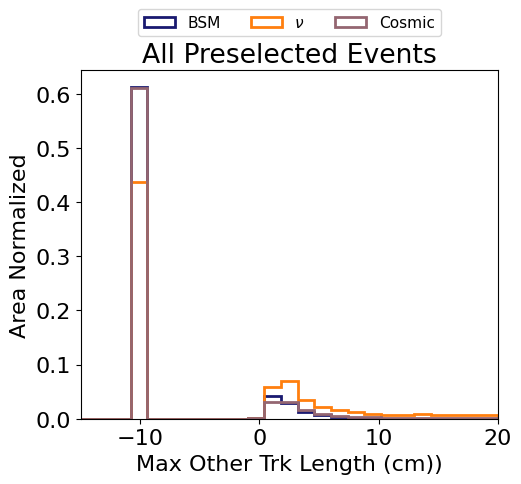

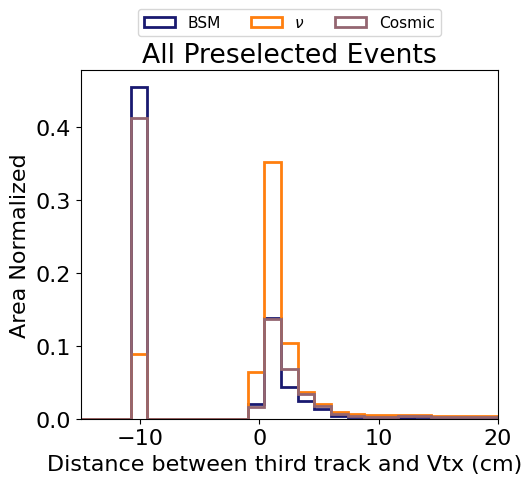

In [86]:
# OTHER TRACK LENGTH & DIST TO VTX

makeplot(evtdf,
         evtdf.max_othr_trk_len,
         (-15,20),
         xlabel = "Max Other Trk Length (cm))",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='noname', density=True,
         logy=False, vline=[], title='All Preselected Events')

makeplot(evtdf,
         evtdf.third_trk_dist,
         (-15,20),
         xlabel = "Distance between third track and Vtx (cm))",
         bins = 25,
         detailed_bsm=False,
         detailed_nu='none', # int_type
         hps_final_state=False,
         plotname='noname', density=True,
         logy=False, vline=[], title='All Preselected Events')

### W.I.P.
### Momentum asymmetry

In [81]:
def plot_mom_asymmetry(df):
    var = np.abs((recop(df.trunk.trk) - recop(df.branch.trk)) / (recop(df.trunk.trk) + recop(df.branch.trk)))
    #when = SlcInFV(evtdf.slc.vertex) & muselect
    bins = np.linspace(0, 1, 21)
    for c in categories:
        _ = plt.hist(var[when & c], weights=scale[when & c], bins=bins, label=c.name, 
                     histtype="step", linewidth=2, density=True)
    plt.legend(loc="lower left")
    # plt.axvline([0.3], linestyle=":", color="r", linewidth=2)

    plt.tight_layout()
    plt.xlabel("Momentum Assymetry")
    plt.title("ICARUS MC")
    plt.ylabel("Area Normalized")

    plt.text(0.4, 0.05, label, transform=plt.gca().transAxes, fontsize=18)

    plt.tight_layout()
    if dosave: plt.savefig(savedir + "momentum_balance_M%i.pdf" % HMASS)
    plt.show()

In [83]:
plot_mom_asymmetry(evtdf)#, sample_description="\n all that pass preselection")#, vline=max_shw_len_thresh)

NameError: name 'recop' is not defined

In [102]:
for c in evtdf.columns:
    print(c)

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 't', '', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'max_proton_ke', '', '', '')
('slc', 'truth', 'nn', '', '', '')
('slc', 'truth', 'np', '', '', '')
('slc', 'truth', 'npi', '', '', '')
('slc', 't

# Make Cuts

In [88]:
cut_results = apply_cuts(evtdf, cut_list_noTrkLenCut, thresholds=thresholds_noTrkLenCut, 
                         detailed_bsm=True, detailed_nu='none', flip_last_cut=False)
#cut_results = apply_cuts(evtdf, cut_list_noTrkLenCut, detailed_hps=True, flip_last_cut=False)
mask = cut_results[-1]
mc_res = cut_results[0]
pot_res = cut_results[1]
percent_res = cut_results[2]
#final_df = add_hdr_info(evtdf)
final_df = add_hdr_info(evtdf[mask], hdrs)

len(categories):  10
len(row_mc):  10
$M_S$ = 220, $\theta_S$ = 1e-05
$M_S$ = 240, $\theta_S$ = 1e-05
$M_S$ = 260, $\theta_S$ = 1e-05
$M_S$ = 280, $\theta_S$ = 1e-05
$M_S$ = 300, $\theta_S$ = 1e-05
$M_S$ = 340, $\theta_S$ = 1e-05
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'
$\nu$
Cosmic
$M_S$ = 220, $\theta_S$ = 1e-05
$M_S$ = 240, $\theta_S$ = 1e-05
$M_S$ = 260, $\theta_S$ = 1e-05
$M_S$ = 280, $\theta_S$ = 1e-05
$M_S$ = 300, $\theta_S$ = 1e-05
$M_S$ = 340, $\theta_S$ = 1e-05
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'
$\nu$
Cosmic
$M_S$ = 220, $\theta_S$ = 1e-05
$M_S$ = 240, $\theta_S$ = 1e-05
$M_S$ = 260, $\theta_S$ = 1e-05
$M_S$ = 280, $\theta_S$ = 1e-05
$M_S$ = 300, $\theta_S$ = 1e-05
$M_S$ = 340, $\theta_S$ = 1e-05
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'
$\nu$
Cosmic
$M_S$ = 220, $\theta_S$ = 1e-05
$M_S$ = 240, $\theta_S$ = 1e-05
$M_S$ =

/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


$M_S$ = 220, $\theta_S$ = 1e-05
$M_S$ = 240, $\theta_S$ = 1e-05
$M_S$ = 260, $\theta_S$ = 1e-05
$M_S$ = 280, $\theta_S$ = 1e-05
$M_S$ = 300, $\theta_S$ = 1e-05
$M_S$ = 340, $\theta_S$ = 1e-05
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'
$\nu$
Cosmic


KeyboardInterrupt: 

In [83]:
print("Number of MC Events: ")
mc_res

Number of MC Events: 


$M_S$ = 220, $\theta_S$ = 1e-05  \
preselection                                              3430   
below 0_5cm dEdx <= 70 MeV/cm                             3268   
up to 1cm dEdx <= 40 MeV/cm                               3255   
up to 2cm dEdx <= 25 MeV/cm                               3242   
up to 3cmdEdx <= 20 MeV/cm                                3238   
max shower len < 20.0 cm                                  3088   
both chi2mu < 18                                          2949   
both chi2p > 90                                           2744   
S_NuMI_angle < 15 deg                                     2277   
opening angle < 30 deg                                    2044   

                               $M_S$ = 240, $\theta_S$ = 1e-05  \
preselection                                              6955   
below 0_5cm dEdx <= 70 MeV/cm                             6624   
up to 1cm dEdx <= 40 MeV/cm                               6613   
up to 2cm dEdx <= 25 MeV/cm                               6596   
up to 3cmdEdx <= 20 MeV/cm                                6594   
max shower len < 20.0 cm                                  6496   
both chi2mu < 18                                          6281   
both chi2p > 90                                           5937   
S_NuMI_angle < 15 deg                                     5264   
opening angle < 30 deg                                    4881   

                               $M_S$ = 260, $\theta_S$ = 1e-05  \
preselection                                              8876   
below 0_5cm dEdx <= 70 MeV/cm                             8372   
up to 1cm dEdx <= 40 MeV/cm                               8367   
up to 2cm dEdx <= 25 MeV/cm                               8350   
up to 3cmdEdx <= 20 MeV/cm                                8349   
max shower len < 20.0 cm                                  8281   
both chi2mu < 18                                          8054   
both chi2p > 90                                           7558   
S_NuMI_angle < 15 deg                                     6911   
opening angle < 30 deg                                    6312   

                               $M_S$ = 280, $\theta_S$ = 1e-05  \
preselection                                              5768   
below 0_5cm dEdx <= 70 MeV/cm                             5456   
up to 1cm dEdx <= 40 MeV/cm                               5452   
up to 2cm dEdx <= 25 MeV/cm                               5440   
up to 3cmdEdx <= 20 MeV/cm                                5439   
max shower len < 20.0 cm                                  5411   
both chi2mu < 18                                          5243   
both chi2p > 90                                           4919   
S_NuMI_angle < 15 deg                                     4497   
opening angle < 30 deg                                    3927   

                               $M_S$ = 300, $\theta_S$ = 1e-05  \
preselection                                             10035   
below 0_5cm dEdx <= 70 MeV/cm                             9461   
up to 1cm dEdx <= 40 MeV/cm                               9448   
up to 2cm dEdx <= 25 MeV/cm                               9430   
up to 3cmdEdx <= 20 MeV/cm                                9425   
max shower len < 20.0 cm                                  9382   
both chi2mu < 18                                          9086   
both chi2p > 90                                           8529   
S_NuMI_angle < 15 deg                                     7813   
opening angle < 30 deg                                    6498   

                               $M_S$ = 340, $\theta_S$ = 1e-05  \
preselection                                             14163   
below 0_5cm dEdx <= 70 MeV/cm                            13393   
up to 1cm dEdx <= 40 MeV/cm                              13362   
up to 2cm dEdx <= 25 MeV/cm                              13332   
up to 3cmdEdx <= 20 MeV/cm                               13326   


In [84]:
print("Fraction of Events: ")
percent_res

Fraction of Events: 


$M_S$ = 220, $\theta_S$ = 1e-05  \
preselection                                          1.000000   
below 0_5cm dEdx <= 70 MeV/cm                         0.952770   
up to 1cm dEdx <= 40 MeV/cm                           0.948980   
up to 2cm dEdx <= 25 MeV/cm                           0.945190   
up to 3cmdEdx <= 20 MeV/cm                            0.944023   
max shower len < 20.0 cm                              0.900292   
both chi2mu < 18                                      0.859767   
both chi2p > 90                                       0.800000   
S_NuMI_angle < 15 deg                                 0.663848   
opening angle < 30 deg                                0.595918   

                               $M_S$ = 240, $\theta_S$ = 1e-05  \
preselection                                          1.000000   
below 0_5cm dEdx <= 70 MeV/cm                         0.952408   
up to 1cm dEdx <= 40 MeV/cm                           0.950827   
up to 2cm dEdx <= 25 MeV/cm                           0.948382   
up to 3cmdEdx <= 20 MeV/cm                            0.948095   
max shower len < 20.0 cm                              0.934004   
both chi2mu < 18                                      0.903091   
both chi2p > 90                                       0.853630   
S_NuMI_angle < 15 deg                                 0.756866   
opening angle < 30 deg                                0.701797   

                               $M_S$ = 260, $\theta_S$ = 1e-05  \
preselection                                          1.000000   
below 0_5cm dEdx <= 70 MeV/cm                         0.943218   
up to 1cm dEdx <= 40 MeV/cm                           0.942654   
up to 2cm dEdx <= 25 MeV/cm                           0.940739   
up to 3cmdEdx <= 20 MeV/cm                            0.940626   
max shower len < 20.0 cm                              0.932965   
both chi2mu < 18                                      0.907391   
both chi2p > 90                                       0.851510   
S_NuMI_angle < 15 deg                                 0.778616   
opening angle < 30 deg                                0.711131   

                               $M_S$ = 280, $\theta_S$ = 1e-05  \
preselection                                          1.000000   
below 0_5cm dEdx <= 70 MeV/cm                         0.945908   
up to 1cm dEdx <= 40 MeV/cm                           0.945215   
up to 2cm dEdx <= 25 MeV/cm                           0.943135   
up to 3cmdEdx <= 20 MeV/cm                            0.942961   
max shower len < 20.0 cm                              0.938107   
both chi2mu < 18                                      0.908981   
both chi2p > 90                                       0.852809   
S_NuMI_angle < 15 deg                                 0.779646   
opening angle < 30 deg                                0.680825   

                               $M_S$ = 300, $\theta_S$ = 1e-05  \
preselection                                          1.000000   
below 0_5cm dEdx <= 70 MeV/cm                         0.942800   
up to 1cm dEdx <= 40 MeV/cm                           0.941505   
up to 2cm dEdx <= 25 MeV/cm                           0.939711   
up to 3cmdEdx <= 20 MeV/cm                            0.939213   
max shower len < 20.0 cm                              0.934928   
both chi2mu < 18                                      0.905431   
both chi2p > 90                                       0.849925   
S_NuMI_angle < 15 deg                                 0.778575   
opening angle < 30 deg                                0.647534   

                               $M_S$ = 340, $\theta_S$ = 1e-05  \
preselection                                          1.000000   
below 0_5cm dEdx <= 70 MeV/cm                         0.945633   
up to 1cm dEdx <= 40 MeV/cm                           0.943444   
up to 2cm dEdx <= 25 MeV/cm                           0.941326   
up to 3cmdEdx <= 20 MeV/cm                            0.940902   


In [85]:
print("Normalized to " + POTSTR + ":")
pot_res

Normalized to 2.41e20 POT:


$M_S$ = 220, $\theta_S$ = 1e-05  \
preselection                                              0.01   
below 0_5cm dEdx <= 70 MeV/cm                             0.01   
up to 1cm dEdx <= 40 MeV/cm                               0.01   
up to 2cm dEdx <= 25 MeV/cm                               0.01   
up to 3cmdEdx <= 20 MeV/cm                                0.01   
max shower len < 20.0 cm                                  0.01   
both chi2mu < 18                                          0.01   
both chi2p > 90                                           0.01   
S_NuMI_angle < 15 deg                                     0.00   
opening angle < 30 deg                                    0.00   

                               $M_S$ = 240, $\theta_S$ = 1e-05  \
preselection                                              0.07   
below 0_5cm dEdx <= 70 MeV/cm                             0.07   
up to 1cm dEdx <= 40 MeV/cm                               0.07   
up to 2cm dEdx <= 25 MeV/cm                               0.07   
up to 3cmdEdx <= 20 MeV/cm                                0.07   
max shower len < 20.0 cm                                  0.07   
both chi2mu < 18                                          0.07   
both chi2p > 90                                           0.06   
S_NuMI_angle < 15 deg                                     0.06   
opening angle < 30 deg                                    0.05   

                               $M_S$ = 260, $\theta_S$ = 1e-05  \
preselection                                              0.19   
below 0_5cm dEdx <= 70 MeV/cm                             0.18   
up to 1cm dEdx <= 40 MeV/cm                               0.18   
up to 2cm dEdx <= 25 MeV/cm                               0.18   
up to 3cmdEdx <= 20 MeV/cm                                0.18   
max shower len < 20.0 cm                                  0.18   
both chi2mu < 18                                          0.17   
both chi2p > 90                                           0.16   
S_NuMI_angle < 15 deg                                     0.15   
opening angle < 30 deg                                    0.14   

                               $M_S$ = 280, $\theta_S$ = 1e-05  \
preselection                                              0.29   
below 0_5cm dEdx <= 70 MeV/cm                             0.27   
up to 1cm dEdx <= 40 MeV/cm                               0.27   
up to 2cm dEdx <= 25 MeV/cm                               0.27   
up to 3cmdEdx <= 20 MeV/cm                                0.27   
max shower len < 20.0 cm                                  0.27   
both chi2mu < 18                                          0.26   
both chi2p > 90                                           0.25   
S_NuMI_angle < 15 deg                                     0.22   
opening angle < 30 deg                                    0.20   

                               $M_S$ = 300, $\theta_S$ = 1e-05  \
preselection                                              0.33   
below 0_5cm dEdx <= 70 MeV/cm                             0.31   
up to 1cm dEdx <= 40 MeV/cm                               0.31   
up to 2cm dEdx <= 25 MeV/cm                               0.31   
up to 3cmdEdx <= 20 MeV/cm                                0.31   
max shower len < 20.0 cm                                  0.31   
both chi2mu < 18                                          0.30   
both chi2p > 90                                           0.28   
S_NuMI_angle < 15 deg                                     0.26   
opening angle < 30 deg                                    0.21   

                               $M_S$ = 340, $\theta_S$ = 1e-05  \
preselection                                              0.24   
below 0_5cm dEdx <= 70 MeV/cm                             0.23   
up to 1cm dEdx <= 40 MeV/cm                               0.23   
up to 2cm dEdx <= 25 MeV/cm                               0.22   
up to 3cmdEdx <= 20 MeV/cm                                0.22   


In [32]:
print(final_df.shape)
final_df

(58763, 273)


slc                          \
                                     is_clear_cosmic      vertex               
                                                               x           y   
                                                                               
                                                                               
                                                                               
sample __ntuple entry rec.slc..index                                           
0      12       13    19                           0  279.399506 -163.423401   
                22    15                           0  297.731079  -91.612556   
       23       21    3                            0 -239.865005 -154.935364   
                46    18                           0  259.378754  -98.991455   
       16       12    9                            0  232.919266   49.290867   
..                                               ...         ...         ...   
9      9268     51    0                            0 -310.104797 -155.370544   
       9269     0     15                           0  306.108673   78.900635   
       9271     29    0                            0 -203.210770  -13.589844   
       9273     2     0                            0 -105.325905  -86.882744   
       9277     20    0                            0 -156.450882  -38.107788   

                                                                               \
                                                 self    tmatch                 
                                               z            eff       pur idx   
                                                                                
                                                                                
                                                                                
sample __ntuple entry rec.slc..index                                            
0      12       13    19             -721.073303  199  0.852546  0.984286   0   
                22    15             -112.103668  101  0.929139  0.982112   0   
       23       21    3               762.333679  126  0.896308  0.995576   0   
                46    18             -814.678406  181  0.876618  0.951950   0   
       16       12    9               149.034271  166  0.722878  0.996284   0   
..                                           ...  ...       ...       ...  ..   
9      9268     51    0              -846.610474  188  0.782483  0.966201   1   
       9269     0     15             -446.387970  111  0.895806  0.995364   0   
       9271     29    0               696.705872  239  0.770807  0.960276   0   
       9273     2     0               -45.646187  148  0.673611  0.985591   0   
       9277     20    0               493.636292  159  0.891991  0.989783   0   

                                                             ...        \
                                     producer          nuid  ... truth   
                                              crlongtrkdiry  ...  time   
                                                             ...         
                                                             ...         
                                                             ...         
sample __ntuple entry rec.slc..index                         ...         
0      12       13    19                    1     -0.029921  ...   NaN   
                22    15                    1     -0.069618  ...   NaN   
       23       21    3                     0     -0.128987  ...   NaN   
                46    18                    1     -0.023316  ...   NaN   
       16       12    9                     1      0.048118  ...   NaN   
..                                        ...           ...  ...   ...   
9      9268     51    0                     0     -0.320577  ...   NaN   
       9269     0     15                    1      0.009720  ...   NaN   
       9271     29    0                

## Extract info needed for event display

In [92]:
# THE FOLLOWING DOESN'T WORK LIKE WE EXPECTED IT TO.

c = -2
c=1

cats = make_categories(final_df)
mydf = final_df[cats[c]]
print(cats[c].name)
mydf.shape
#final_df[cats[5]][final_df[cats[5]]['proc']==5 & final_df[cats[5]]['cluster']==4372431]
mydf
pair=0
for idx in mydf.index:
    if [int(mydf.loc[idx]['cluster']), int(mydf.loc[idx]['proc'])] == pair: continue
    else:
        address = [int(mydf.loc[idx]['cluster']), int(mydf.loc[idx]['proc']), idx[2]]
        print(idx, ': ', address)

$\nu$
(10, 179, 74, 16) :  [6200373, 530, 74]
(10, 270, 132, 15) :  [6200373, 460, 132]
(10, 500, 222, 1) :  [6200373, 557, 222]
(10, 592, 179, 20) :  [6200373, 349, 179]
(10, 604, 206, 0) :  [6200373, 565, 206]
(10, 817, 253, 22) :  [6200373, 756, 253]
(10, 843, 257, 12) :  [6200373, 533, 257]
(10, 845, 6, 21) :  [6200373, 827, 6]
(10, 854, 56, 1) :  [6200373, 972, 56]
(10, 859, 56, 0) :  [6200373, 911, 56]
(10, 904, 28, 0) :  [6200373, 733, 28]
(10, 936, 171, 10) :  [6200373, 869, 171]
(10, 995, 88, 19) :  [6200373, 1005, 88]
(10, 998, 168, 0) :  [6200373, 1008, 168]
(10, 1012, 132, 15) :  [6200373, 1022, 132]
(10, 1196, 99, 0) :  [6200373, 1206, 99]
(10, 1248, 211, 28) :  [6200373, 1258, 211]
(10, 1394, 154, 0) :  [6200373, 1404, 154]
(10, 1553, 276, 16) :  [6200373, 1563, 276]
(10, 1620, 250, 0) :  [6200373, 1631, 250]
(10, 1748, 181, 0) :  [6200373, 1759, 181]
(10, 1782, 62, 10) :  [6200373, 1793, 62]
(10, 2022, 44, 0) :  [6200373, 2033, 44]
(10, 2036, 117, 0) :  [6200373, 2047, 1

In [43]:
for col in mydf.columns:
    print(col)

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 't', '', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'max_proton_ke', '', '', '')
('slc', 'truth', 'nn', '', '', '')
('slc', 'truth', 'np', '', '', '')
('slc', 'truth', 'nmu', '', '', '')
('slc', 't

## See what kinds of neutrinos remain

['$\\nu_\\mu$ CC COH' '$\\nu_\\mu$ CC Other' '$\\nu_\\mu$ CC n$\\pi$0p'
 '$\\nu_\\mu$ CC n$\\pi$np' 'not $\\nu_\\mu$ CC']
['$\\nu_\\mu$ CC COH' '$\\nu_\\mu$ CC Other' '$\\nu_\\mu$ CC n$\\pi$np'
 '$\\nu_\\mu$ CC n$\\pi$0p' 'not $\\nu_\\mu$ CC']


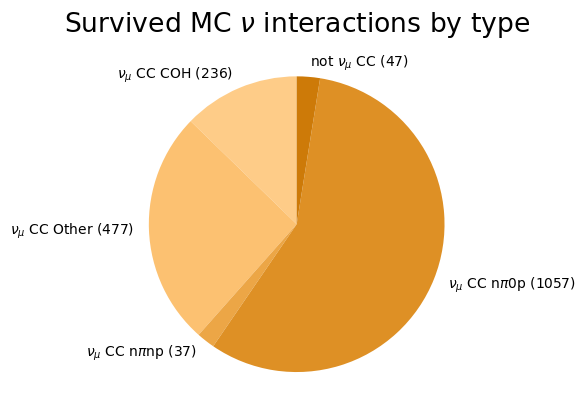

In [54]:
remaining_nus = final_df[make_categories(final_df)[-2]]
remaining_nus = add_nu_int_type(remaining_nus)
survived_types = np.unique(remaining_nus.nu_mode)
print(survived_types)
# change the order so the pie chart looks better:
survived_types = np.array([
    survived_types[0],
    survived_types[1],
    survived_types[3],
    survived_types[2],
    survived_types[-1]
])
print(survived_types)
narray = []
labels = []
for st in survived_types:
    n = remaining_nus[remaining_nus.nu_mode == st].shape[0]
    narray.append(n)
    labels.append(st + ' (%a)' % n)
plt.pie(narray, labels = labels, colors = oranges, startangle = 90, textprops={'fontsize': 10})
plt.title('Survived MC $\\nu$ interactions by type' )
#if dosave: plt.savefig(savedir + "containment_%a.pdf" % c.name, bbox_inches = mpl.transforms.Bbox([[-1,0], [7,5]]))
plt.show()


In [26]:
# Truth particles:

#plt.hist(remaining_nus.slc.truth.p0.pdg, bins=31, range=(-15,15))
#plt.xlabel("Survived nu interactions' p0 PDG")
#plt.show()
print(np.unique(remaining_nus.slc.truth.p0.pdg))

#plt.hist(remaining_nus.slc.truth.p1.pdg)#, bins=31, range=(-15,15))
#plt.xlabel("Survived nu interactions' p1 PDG")
#plt.show()
print(np.unique(remaining_nus.slc.truth.p1.pdg))

# Track true particle PDGs:
print('')
print(np.unique(remaining_nus.trunk.trk.truth.p.pdg))
print(np.unique(remaining_nus.branch.trk.truth.p.pdg))

remaining_nus_w_pion = remaining_nus[(np.abs(remaining_nus.trunk.trk.truth.p.pdg)==211) | 
                                     (np.abs(remaining_nus.branch.trk.truth.p.pdg)==211)
                                    ]
print(remaining_nus.shape)
print(remaining_nus_w_pion.shape)

###

# 211: pi+
# -211: pi-
# 311: K0
# 2112: n
# 2212: p
#3122: Delta

#for c in remaining_nus.columns:
#    print(c)

[-13.  13.]
[-211.  211. 2112. 2212.]

[-211  -13   13  211]
[-211  -13   13   22  211 2212]
(13, 211)
(7, 211)


In [119]:
for c in evtdf.columns:
    print(c)

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 't', '', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'max_proton_ke', '', '', '')
('slc', 'truth', 'nn', '', '', '')
('slc', 'truth', 'np', '', '', '')
('slc', 'truth', 'npi', '', '', '')
('slc', 't

### Look into protons and performance of stub cut at getting rid of them: 
###    (doesn't look like it's actually doing much :/ )

ValueError: weights should have the same shape as x

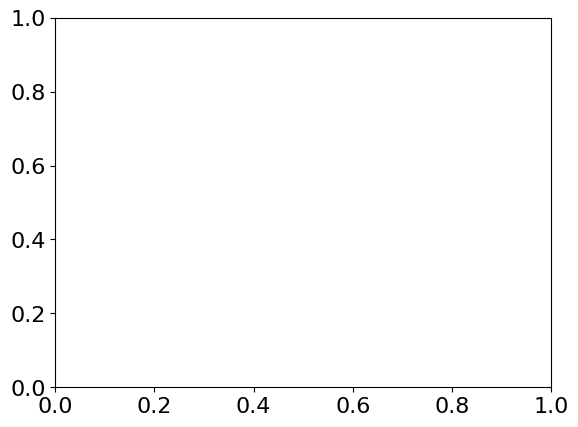

In [31]:
check_proton_stubs(evtdf, detailed_nu=True)

$M_S$ = 220, $\theta_S$ = 5e-05
$M_S$ = 240, $\theta_S$ = 5e-05
$M_S$ = 260, $\theta_S$ = 5e-05
$M_S$ = 300, $\theta_S$ = 3e-05
$M_S$ = 330, $\theta_S$ = 2e-05
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = 1000000.0
$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = 1000000.0
$\nu$
Cosmic
24.0
74739
60997


/tmp/ipykernel_11623/498941048.py:130: RuntimeWarning: invalid value encountered in true_divide
  cut_results_df_percent.loc[func_output[1]] = np.array(row_mc)/np.array(first_row_mc)


ValueError: too many values to unpack (expected 2)

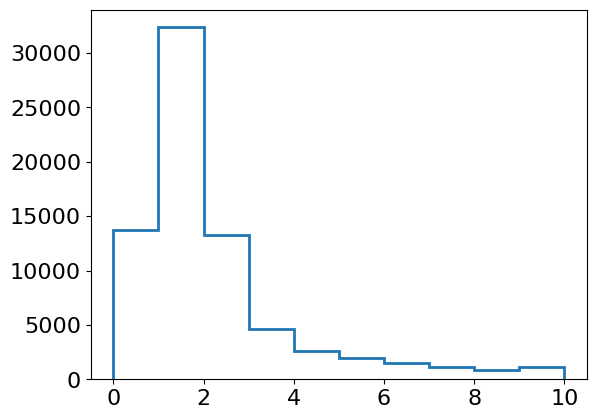

In [39]:
categories = make_categories(evtdf)

###########

nu_evtdf = evtdf[categories[-2]]
print(max(evtdf.slc.truth.np))
print(nu_evtdf.shape[0])
print(nu_evtdf[nu_evtdf.slc.truth.np > 0].shape[0])

cut_results = apply_cuts(nu_evtdf, [stub_mask], flip_last_cut=False)
mask = cut_results[-1]
noStub_nu_evtdf = add_hdr_info(nu_evtdf[mask])



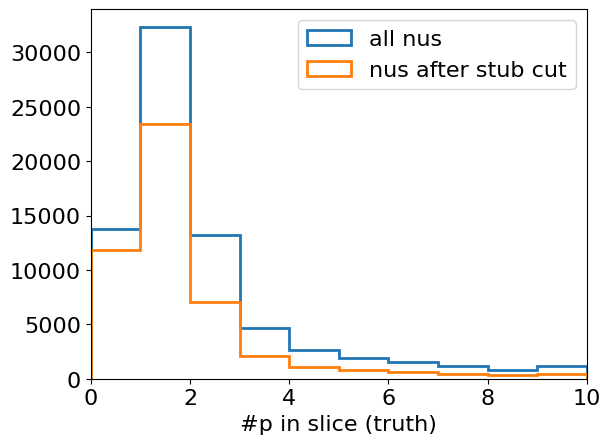

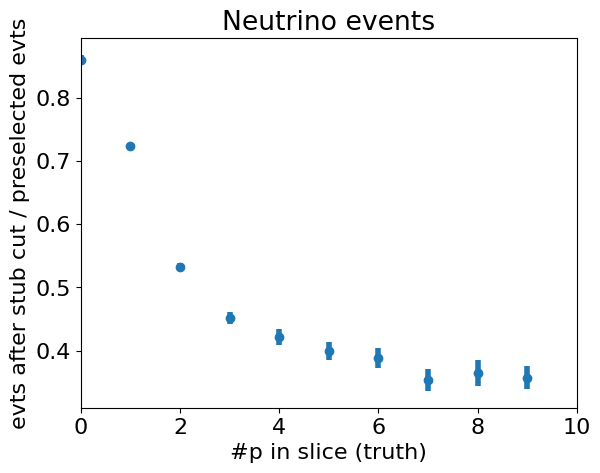

<class 'tuple'>
zero kinetic p:  (13742, 208)
zero kinetic p:  (11811, 210)


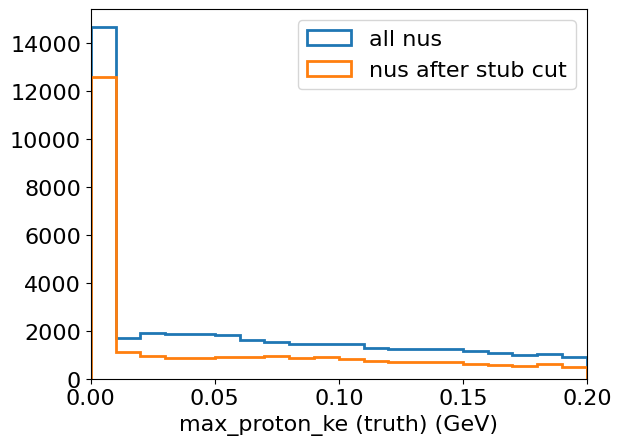

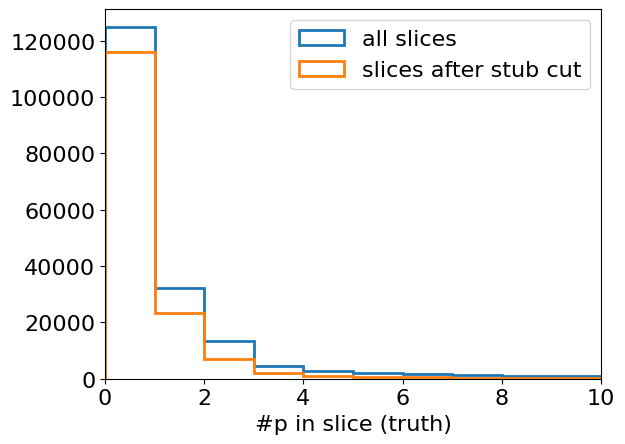

In [50]:
xrange = (0,10)
mybins = 10
n = plt.hist(nu_evtdf.slc.truth.np, bins=mybins, range=xrange, histtype='step', linewidth=2, label='all nus')
noStub_n = plt.hist(noStub_nu_evtdf.slc.truth.np, bins=mybins, range=xrange, histtype='step', linewidth=2, label='nus after stub cut')
#plt.hist(remaining_nus.slc.truth.np, bins=mybins, range=xrange, histtype='step')
plt.legend()
plt.xlim(xrange)
plt.xlabel('#p in slice (truth)')
plt.show()

err = np.sqrt(noStub_n[0]/(n[0])**2 + 4*(noStub_n[0])**2*(n[0])**(-5))
plt.errorbar(n[1][:-1], noStub_n[0]/n[0], yerr=err, fmt="o")
plt.xlim(xrange)
plt.xlabel('#p in slice (truth)')
plt.ylabel('evts after stub cut / preselected evts')
plt.title("Neutrino events")
plt.show()

print(type(n))

# 

print('zero kinetic p: ', nu_evtdf[nu_evtdf.slc.truth.max_proton_ke == 0.].shape)
print('zero kinetic p: ', noStub_nu_evtdf[noStub_nu_evtdf.slc.truth.max_proton_ke == 0.].shape)
xrange = (0, 0.2)
mybins = 20
plt.hist(nu_evtdf.slc.truth.max_proton_ke, histtype='step', linewidth=2, 
         label='all nus', bins=mybins, range=xrange)
plt.hist(noStub_nu_evtdf.slc.truth.max_proton_ke, histtype='step', linewidth=2, 
         label='nus after stub cut', bins=mybins, range=xrange)
#plt.hist(remaining_nus.slc.truth.np, bins=mybins, range=xrange, histtype='step')
plt.legend()
plt.xlim(xrange)
plt.xlabel('max_proton_ke (truth) (GeV)')
plt.show()

##

cut_results = apply_cuts(evtdf, [stub_mask], flip_last_cut=False)
mask = cut_results[-1]
#noStub_evtdf = add_hdr_info(evtdf[mask])
noStub_evtdf = evtdf[mask]

xrange = (0,10)
mybins = 10
plt.hist(evtdf.slc.truth.np, bins=mybins, range=xrange, histtype='step', linewidth=2, label='all slices')
plt.hist(noStub_evtdf.slc.truth.np, bins=mybins, range=xrange, histtype='step', linewidth=2, 
         label='slices after stub cut')
#plt.hist(remaining_nus.slc.truth.np, bins=mybins, range=xrange, histtype='step')
plt.legend()
plt.xlim(xrange)
plt.xlabel('#p in slice (truth)')
plt.show()

/tmp/ipykernel_11623/2178594100.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(noStub_evtdf[noStub_categories[c]].slc.truth.np, bins=mybins, range=xrange, histtype='step',


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

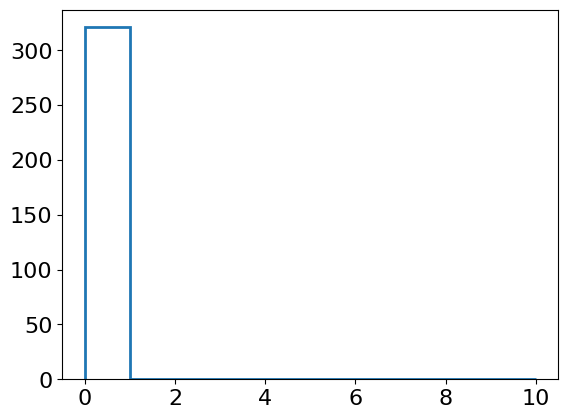

In [51]:
cut_results = apply_cuts(evtdf, [stub_mask], flip_last_cut=False)
mask = cut_results[-1]
noStub_evtdf = add_hdr_info(evtdf[mask])

categories = make_categories(evtdf, detailed_nu=True)
noStub_categories = make_categories(noStub_nu_evtdf, detailed_nu=True)

xrange = (0,10)
mybins = 10
for c in range(len(categories)):
    plt.hist(evtdf[categories[c]].slc.truth.np, bins=mybins, range=xrange, histtype='step', 
             linewidth=2, label='all preselected')
    plt.hist(noStub_evtdf[noStub_categories[c]].slc.truth.np, bins=mybins, range=xrange, histtype='step', 
             linewidth=2, label='after stub cut')
    plt.legend()
    plt.xlim(xrange)
    plt.xlabel('#p in slice (truth)')
    plt.title(categories[c].name)
    plt.show()


/tmp/ipykernel_11623/498941048.py:130: RuntimeWarning: invalid value encountered in true_divide
  cut_results_df_percent.loc[func_output[1]] = np.array(row_mc)/np.array(first_row_mc)


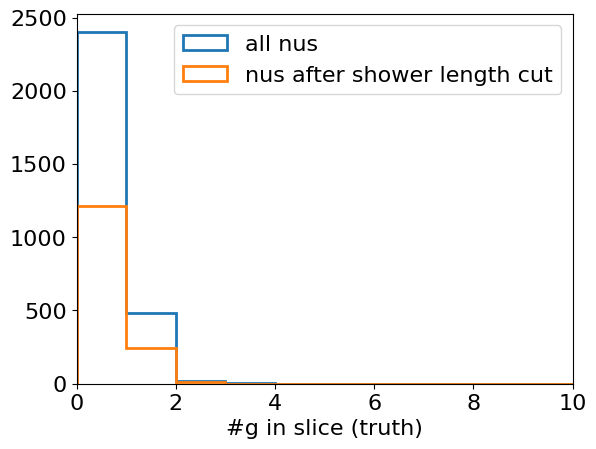

/tmp/ipykernel_11623/990237062.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(nu_evtdf[categories[0]].slc.truth.ng, bins=mybins, range=xrange, histtype='step',


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 [<matplotlib.patches.Polygon at 0x7f15c9bedb50>])

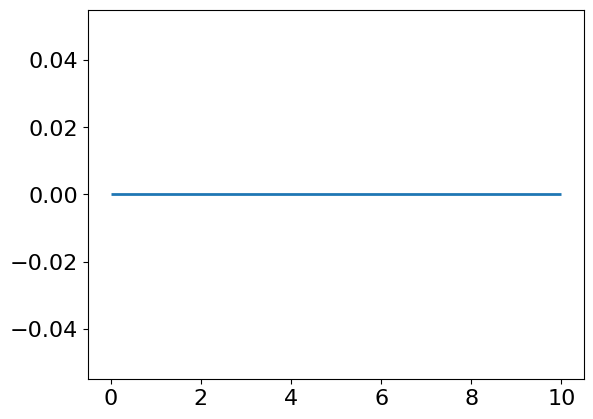

In [35]:
# How many gammas?

cut_results = apply_cuts(nu_evtdf, [max_shw_len_mask], flip_last_cut=False)
mask = cut_results[-1]
noShow_nu_evtdf = add_hdr_info(nu_evtdf[mask])

xrange = (0,10)
mybins = 10
plt.hist(nu_evtdf.slc.truth.ng, bins=mybins, range=xrange, histtype='step', linewidth=2, label='all nus')
plt.hist(noShow_nu_evtdf.slc.truth.ng, bins=mybins, range=xrange, histtype='step', linewidth=2, 
         label='nus after shower length cut')
#plt.hist(remaining_nus.slc.truth.np, bins=mybins, range=xrange, histtype='step')
plt.legend()
plt.xlim(xrange)
plt.xlabel('#g in slice (truth)')
plt.show()

plt.hist(nu_evtdf[categories[0]].slc.truth.ng, bins=mybins, range=xrange, histtype='step', 
         linewidth=2, label='all '+categories[0].name)


In [136]:
evtdf[categories[0]].slc.truth.ng
#nu_evtdf[categories[0]]

sample  __ntuple  entry  rec.slc..index
0       18        19     0                 0.0
        4         15     0                 0.0
        2         6      1                 0.0
        16        6      0                 0.0
                  23     19                0.0
                                          ... 
        468       24     9                 0.0
        466       20     8                 0.0
        469       9      0                 0.0
        470       1      13                0.0
                  16     0                 0.0
Name: ng, Length: 321, dtype: float64

## Optimize Cuts 

Create statistical significance scatter plot for each sample individually. Then eyeball the best choice - one size fits all style.

~~~~

TO DO:

- fix to handle the various samples
- optimize for all cuts (including chi2 and dQ/dx)

~~~~

For simplicity, it makes sense to lump together all BSM and do one optimization.

But, that optimization scales to expected numbers of events per POT, and that assumes benchmark parameters (theta, fa). How can I optimize for all at once? Is it even possible?

For a given model with different benchmark parameters, the optimization will vary.

In [19]:
cat = make_categories(evtdf, detailed_bsm=True)
for c in cat: print(c.name)

$M_S$ = 220, $\theta_S$ = 1e-05
$M_S$ = 240, $\theta_S$ = 1e-05
$M_S$ = 260, $\theta_S$ = 1e-05
$M_S$ = 280, $\theta_S$ = 1e-05
$M_S$ = 300, $\theta_S$ = 1e-05
$M_S$ = 340, $\theta_S$ = 1e-05
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'
$\nu$
Cosmic


In [20]:
#TODO: plot S/B too (good when dominated by background systs, and also more similar to zero-bg strategy)
# TODO: change colors
def optimize_cut(df, mask, scan_vals, param, detailed_bsm=True, plot=False):
    categories = make_categories(df, detailed_bsm=detailed_bsm) # This one is just to know what the samples are so you can loop over them.
    myrange = [min(scan_vals), max(scan_vals)]
    # STATISTICAL SIGNIFICANCE
    if plot:
        fig, (p0, p1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3,2]}, sharex=True) #, figsize=(7, 6.4)
        fig.subplots_adjust(hspace=0.1) # hspace=0.04
        #fig = plt.figure()
        #ax = plt.subplot(111)
    nMC_bg = []
    for cn, c in enumerate(categories[:-2]): #range(len(categories)-2):
        #print(c.name, ': ', df[c].shape)
        if df[c].shape[0] == 0:
            best_val = -99
            continue
        #significance = []
        numerator = []
        denom = []
        nMC_signal = []
        for val in scan_vals:
            #m = mask(df, thresh=val)[0]
            #temp_df = df[m]
            #cat = make_categories(temp_df) # This one has the correct dimensions to match temp_df, which we'll be using it for.
            #for thing in cat: print(thing.name)
        #for c in range(len(categories)-2):
            numerator.append(sum(df[c][mask(df[c], thresh=val)[0]].scale))
            denom.append(np.sqrt( 
                sum(df[c][mask(df[c], thresh=val)[0]].scale) + 
                sum(df[categories[-2]][mask(df[categories[-2]], thresh=val)[0]].scale) + 
                sum(df[categories[-1]][mask(df[categories[-1]], thresh=val)[0]].scale)
            )
                        )
            #sig = numerator/denom
            #print(type(sig))
            #if math.isnan(sig): 
            #    print('NaN! ')
            #    print('denom_arg: ', denom_arg)
            #    print('df[c][mask(df[c], thresh=val)[0]].shape: ', df[c][mask(df[c], thresh=val)[0]].shape)
            #    #print('sum(df[c][mask(df[c], thresh=val)[0]].scale): ', sum(df[c][mask(df[c], thresh=val)[0]].scale))
            #    print('df[categories[-2]][mask(df[categories[-2]], thresh=val)[0]].shape: ', df[categories[-2]][mask(df[categories[-2]], thresh=val)[0]].shape )
            #    #print('sum(df[categories[-2]][mask(df[categories[-2]], thresh=val)[0]].scale): ', sum(df[categories[-2]][mask(df[categories[-2]], thresh=val)[0]].scale))
            #    print('df[categories[-1]][mask(df[categories[-1]], thresh=val)[0]].shape: ', df[categories[-1]][mask(df[categories[-1]], thresh=val)[0]].shape )
            #    #print('sum(df[categories[-1]][mask(df[categories[-1]], thresh=val)[0]].scale): ', sum(df[categories[-1]][mask(df[categories[-1]], thresh=val)[0]].scale))
            #    print()
            #significance.append(sig)
            nMC_signal.append(df[c][mask(df[c], thresh=val)[0]].shape[0])
            if cn == 0:
                nMC_bg.append(df[categories[-2]][mask(df[categories[-2]], thresh=val)[0]].shape[0] +
                              df[categories[-1]][mask(df[categories[-1]], thresh=val)[0]].shape[0])
        nMC_signal = np.array(nMC_signal)
        numerator = np.array(numerator)
        denom = np.array(denom)
        significance = numerator/denom
        #significance[ (numerator!=0.) & (denom==0.) ] = numerator[ (numerator!=0.) & (denom==0.) ] # I'm fudging here!
        rel_sig = significance/np.max(significance[np.isfinite(significance)])
        #rel_sig[ (numerator!=0.) & (denom==0.) ] = # I'm fudging! #1.
        ok = np.isfinite(rel_sig) # so, it'll just ignore points where significance is infinity or nan
        rel_sig = rel_sig[ok]
        x_vals_sig = scan_vals[ok]
        best_val_sig = x_vals_sig[np.argmax(rel_sig)]
        if plot:
            p0.plot(x_vals_sig, rel_sig, '-',
                     label = (c.name + ' (%a)' % (round(1000 * best_val_sig)/1000.)))#, color=c.color)
            p1.plot(scan_vals, nMC_signal, '-')
        
    nMC_bg = np.array(nMC_bg)
    if plot:
        p1.plot(scan_vals, nMC_bg, '--', color='black', label='Background') # same for any signal category
        plt.xlabel(param)
        p0.set_ylabel('Rel. S/sqrt(S+B) \n per %s' % POTSTR)
        p0.set_xlim(myrange)
        #plt.yscale('log')
        #plt.axvline([best_val], linestyle=":", color="r", linewidth=2)
        
        # legend documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html
        box = p0.get_position()
        p0.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        p0.legend(loc='lower center', bbox_to_anchor=(0.5, 1.03), ncol=1, fontsize='xx-small')
        
        box = p1.get_position()
        p1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        p1.set_ylabel('# MC evts \n selected')
        p1.set_xlim(myrange)
        p1.legend(fontsize='xx-small')
        p1.set_yscale('log')
        plt.show()
    
    
    # S/B
    if plot:
        fig, (p0, p1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3,2]}, sharex=True) #, figsize=(7, 6.4)
        fig.subplots_adjust(hspace=0.04)
    nMC_bg = []
    for cn, c in enumerate(categories[:-2]):
        if df[c].shape[0] == 0:
            best_val = -99
            continue
        S = []
        B = []
        nMC_signal = []
        for val in scan_vals:
            S.append(sum(df[c][mask(df[c], thresh=val)[0]].scale))
            B.append(
                sum(df[categories[-2]][mask(df[categories[-2]], thresh=val)[0]].scale) + 
                sum(df[categories[-1]][mask(df[categories[-1]], thresh=val)[0]].scale)
            )
            nMC_signal.append(df[c][mask(df[c], thresh=val)[0]].shape[0])
            if cn == 0:
                nMC_bg.append(df[categories[-2]][mask(df[categories[-2]], thresh=val)[0]].shape[0] +
                              df[categories[-1]][mask(df[categories[-1]], thresh=val)[0]].shape[0])
        nMC_signal = np.array(nMC_signal)
        S = np.array(S)
        B = np.array(B)
        SoverB = S/B
        #SoverB[ (S!=0.) & (B==0.) ] = S[ (S!=0.) & (B==0.) ] # I'm fudging here!
        rel_SoverB = SoverB/np.max(SoverB[np.isfinite(SoverB)])
        #rel_SoverB[ (S!=0.) & (B==0.) ] = S[ (S!=0.) & (B==0.) ] # I'm fudging! #1. # this rarely (never?) happens             
        ok = np.isfinite(rel_SoverB)
        rel_SoverB = rel_SoverB[ok]
        #print(S, B, SoverB, rel_SoverB, sep='\n \n')   
        #print(rel_SoverB, '\n \n')
        #if rel_SoverB.shape[0] == 0.:
        x_vals_SoverB = scan_vals[ok]
        best_val_SoverB = x_vals_SoverB[np.argmax(rel_SoverB)]
        
        if plot:
            p0.plot(x_vals_SoverB, rel_SoverB, '-', 
                     label = (c.name + ' (%a)' % (round(1000 * best_val_SoverB)/1000.)))#, color=c.color)
            p1.plot(scan_vals, nMC_signal, '-')
    nMC_bg = np.array(nMC_bg)
    if plot:
        p1.plot(scan_vals, nMC_bg, '--', color='black', label='Background') # same for any signal category
        plt.xlabel(param)
        p0.set_ylabel('Relative S/B')
        
        # legend documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html
        box = p0.get_position()
        p0.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        p0.legend(loc='lower center', bbox_to_anchor=(0.5, 1.03), ncol=1, fontsize='xx-small')
        box = p1.get_position()
        p1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        p1.set_ylabel('# MC evts \n selected')
        p1.set_xlim(myrange)
        p1.legend(fontsize='xx-small')
        p1.set_yscale('log')
        plt.show()
        
    return(best_val_sig, best_val_SoverB)

In [23]:
# NuMI Angle

temp_cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
                 max_shw_len_mask, ok_chi2mu, ok_chi2p,
                 open_angle_mask
                ]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_open_angle_thresh
]
df = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]
print(df.shape)


/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


(71566, 271)


/tmp/ipykernel_15119/2851478342.py:56: RuntimeWarning: invalid value encountered in true_divide
  significance = numerator/denom


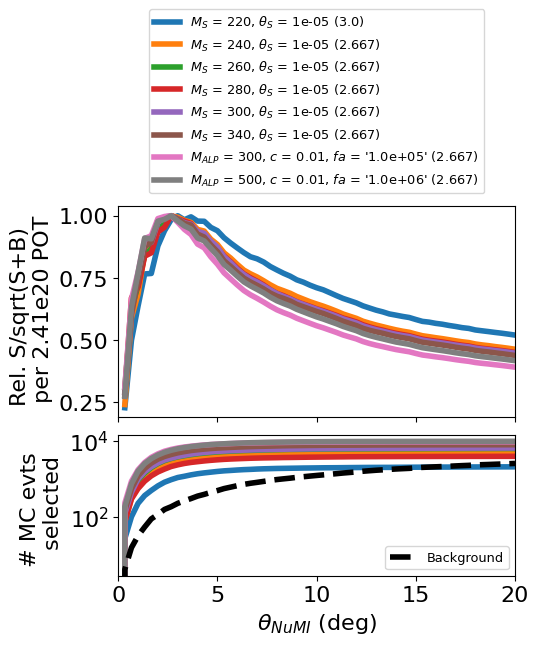

/tmp/ipykernel_15119/2851478342.py:117: RuntimeWarning: invalid value encountered in true_divide
  SoverB = S/B


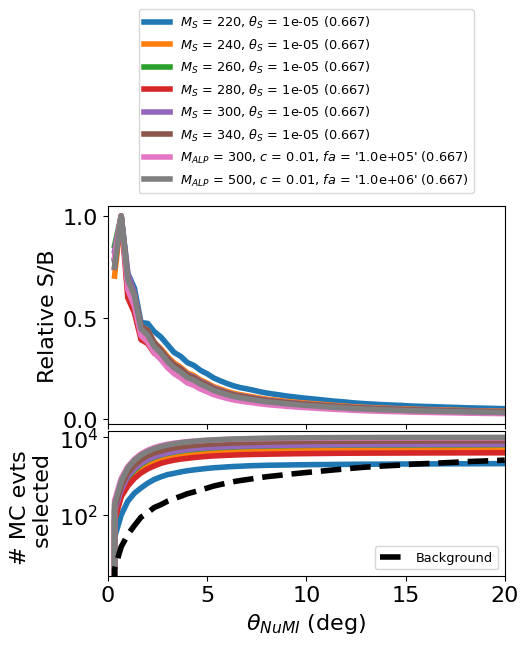

In [24]:
a = optimize_cut(df, numi_angle_mask, np.linspace(0., 20., 61), '$\\theta_{NuMI}$ (deg)', detailed_bsm=True, plot=True)

/tmp/ipykernel_15119/2851478342.py:56: RuntimeWarning: invalid value encountered in true_divide
  significance = numerator/denom


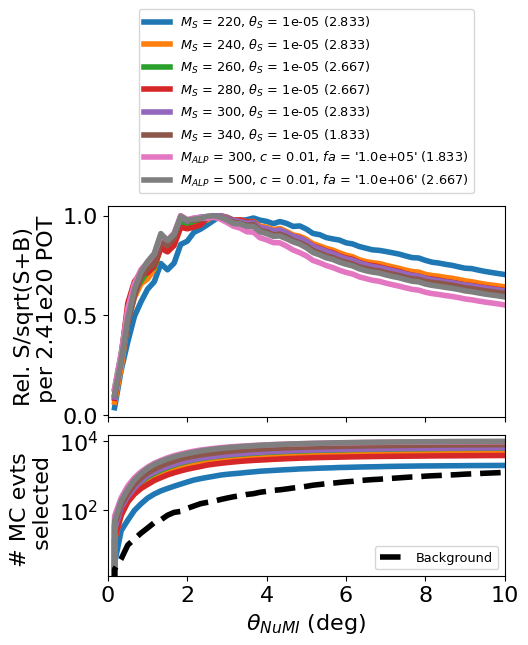

/tmp/ipykernel_15119/2851478342.py:117: RuntimeWarning: invalid value encountered in true_divide
  SoverB = S/B


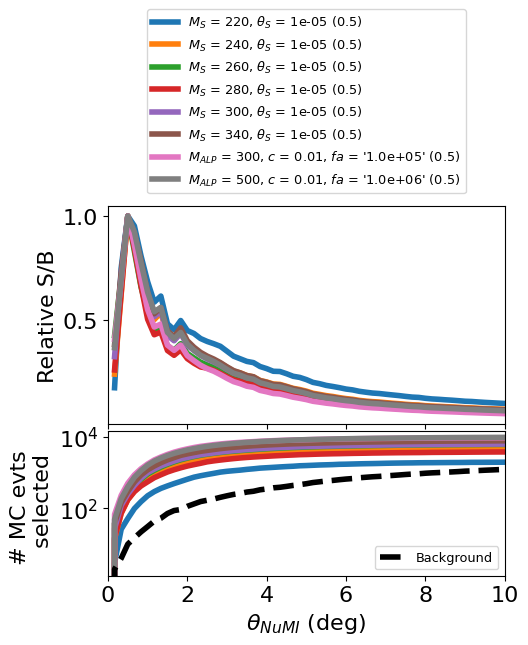

In [25]:
a = optimize_cut(df, numi_angle_mask, np.linspace(0., 10., 61), '$\\theta_{NuMI}$ (deg)', detailed_bsm=True ,plot=True)

In [26]:
# Opening angle

temp_cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
            numi_angle_mask
           ]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh
]
opt_open_angle_df = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]

/tmp/ipykernel_15119/2851478342.py:56: RuntimeWarning: invalid value encountered in true_divide
  significance = numerator/denom


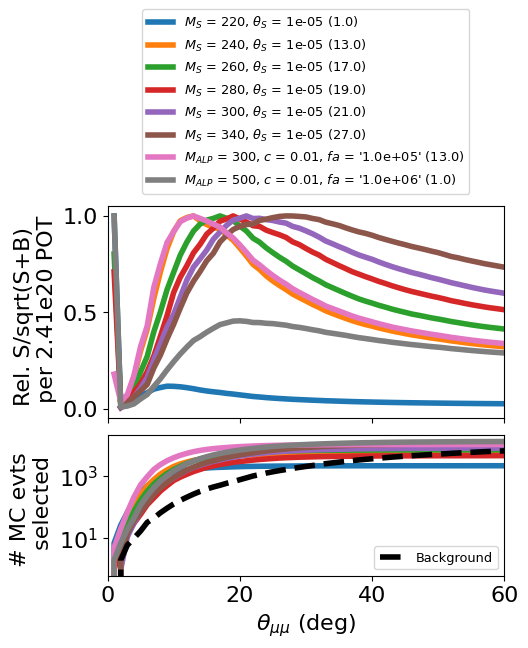

/tmp/ipykernel_15119/2851478342.py:117: RuntimeWarning: divide by zero encountered in true_divide
  SoverB = S/B
/tmp/ipykernel_15119/2851478342.py:117: RuntimeWarning: invalid value encountered in true_divide
  SoverB = S/B


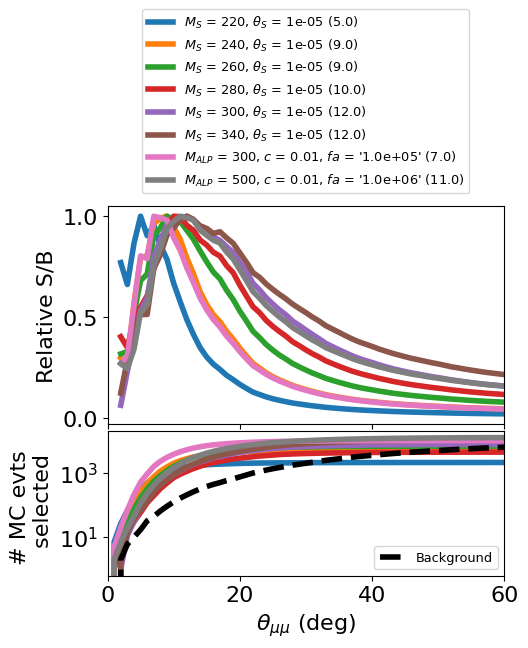

In [27]:
a = optimize_cut(opt_open_angle_df, open_angle_mask, np.linspace(0., 60., 61), '$\\theta_{\mu\mu}$ (deg)', detailed_bsm=True ,plot=True)

In [28]:
# Max Shower Length
#    Note: the reason the significance isn't 0 if you cut with -11 is because some values are NaN, not just -10.

temp_cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]
opt_shwlen_df = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]


/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


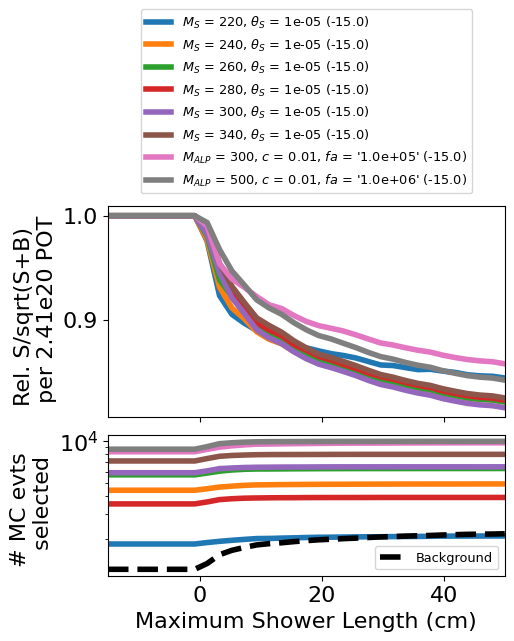

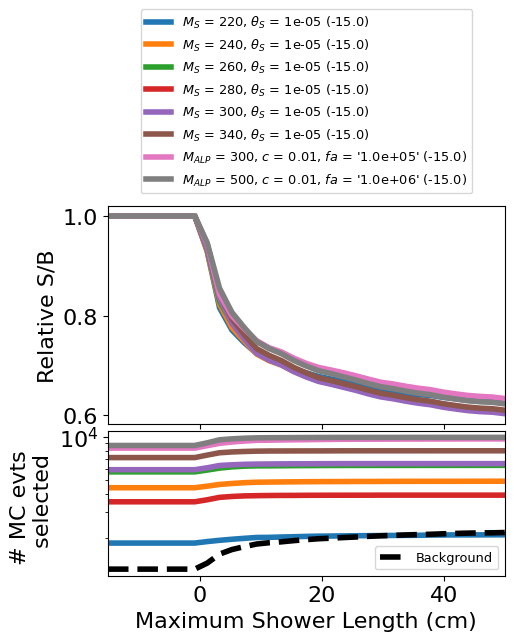

In [29]:
a = optimize_cut(opt_shwlen_df, max_shw_len_mask, np.linspace(-15, 50., 33), 'Maximum Shower Length (cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))


/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


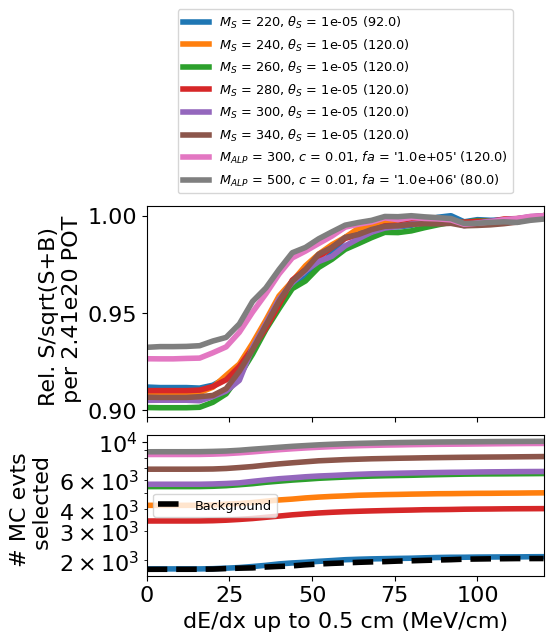

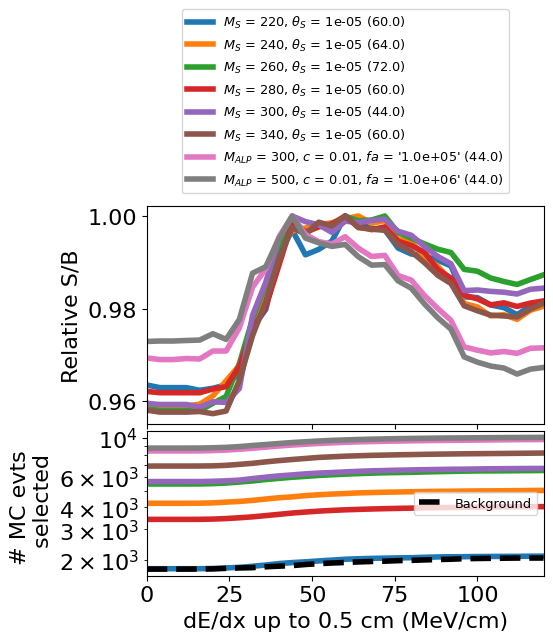

/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


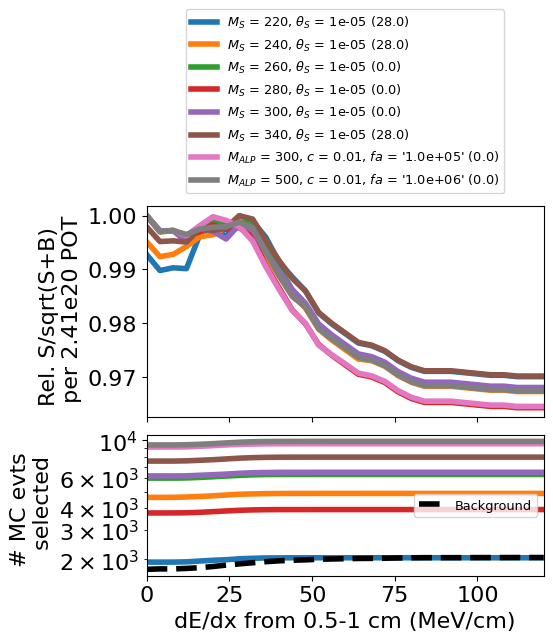

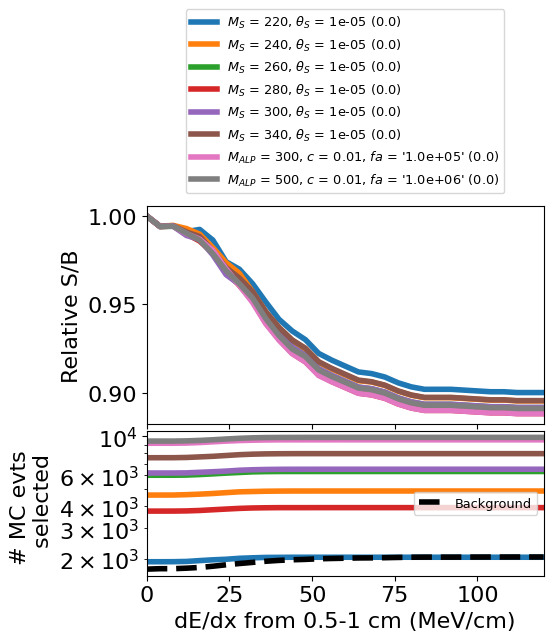

/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


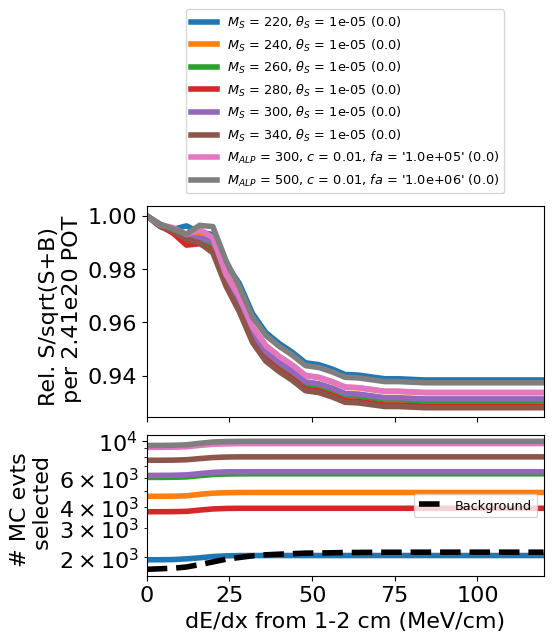

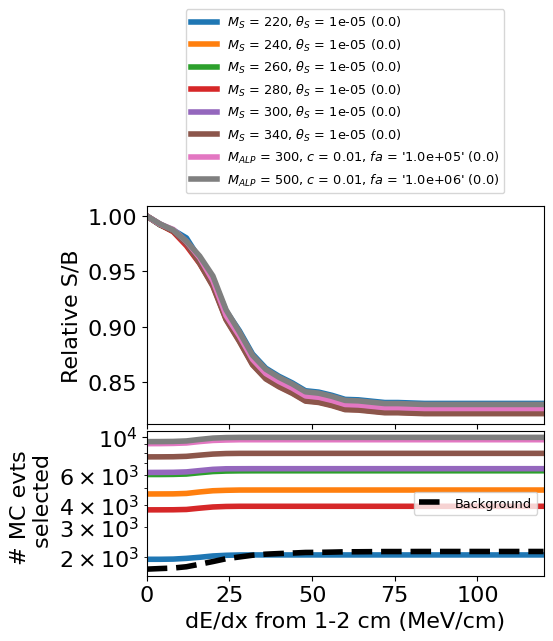

/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


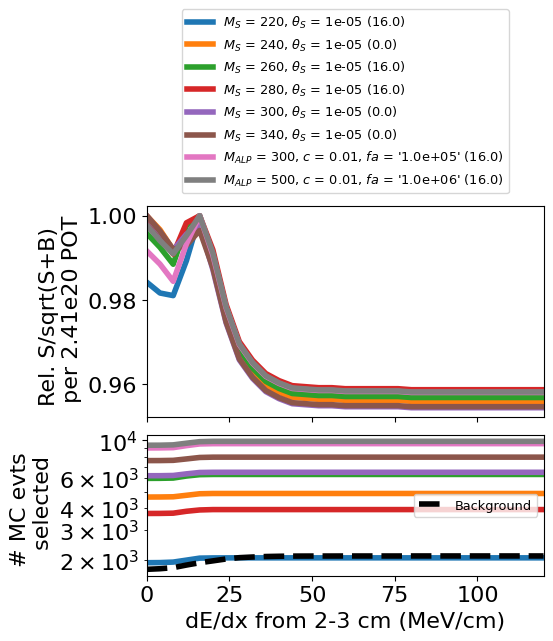

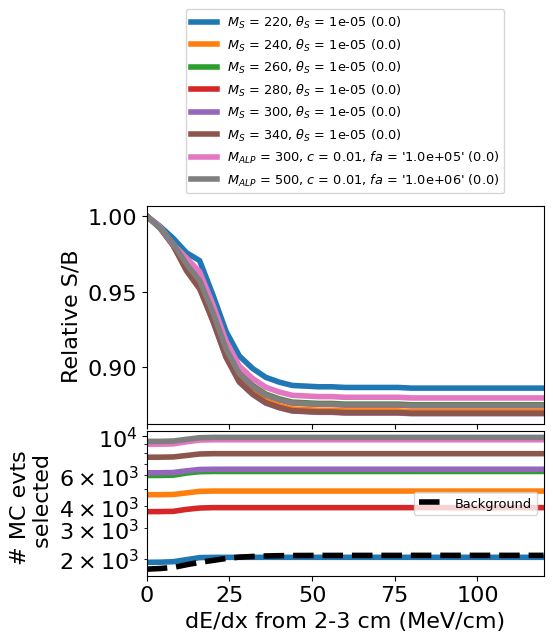

In [30]:
# Stub dE/dx

temp_cut_list = [not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
temp_thresholds = [
    nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]
df_0 = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]
a = optimize_cut(df_0, not_stub_05, np.linspace(0., 120., 31), 'dE/dx up to 0.5 cm (MeV/cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))

temp_cut_list = [not_stub_05, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]
df_1 = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]
a = optimize_cut(df_1, not_stub_1, np.linspace(0., 120., 31), 'dE/dx from 0.5-1 cm (MeV/cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))

temp_cut_list = [not_stub_05, not_stub_1, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]
df_2 = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]
a = optimize_cut(df_2, not_stub_2, np.linspace(0., 120., 31), 'dE/dx from 1-2 cm (MeV/cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))

temp_cut_list = [not_stub_05, not_stub_1, not_stub_2,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]
df_3 = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]
a = optimize_cut(df_3, not_stub_3, np.linspace(0., 120., 31), 'dE/dx from 2-3 cm (MeV/cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))


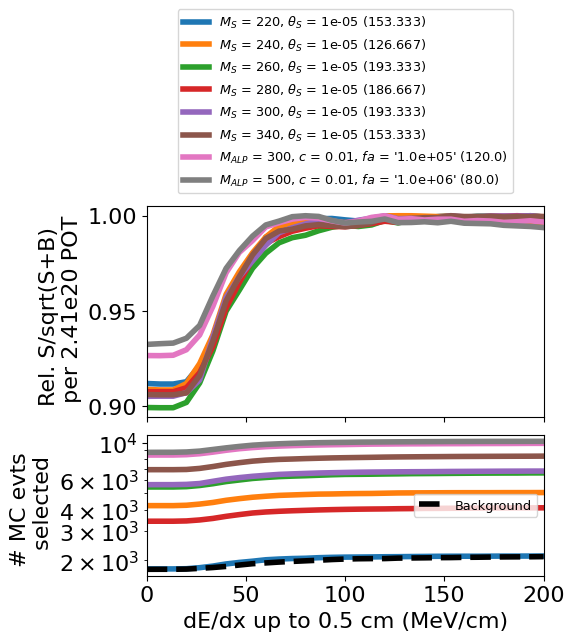

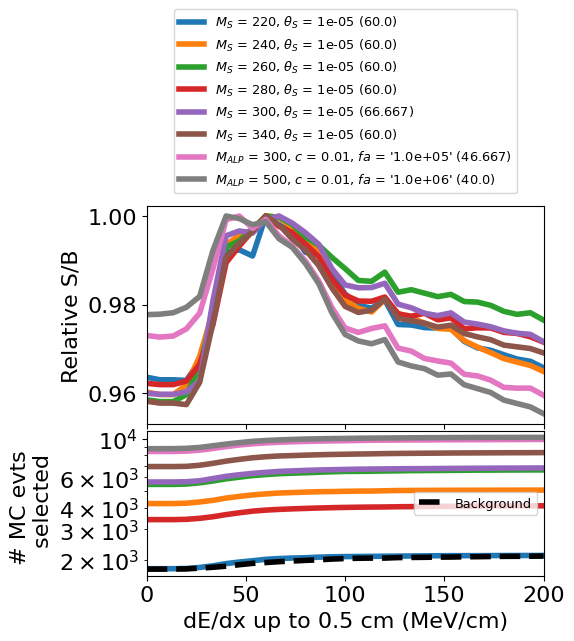

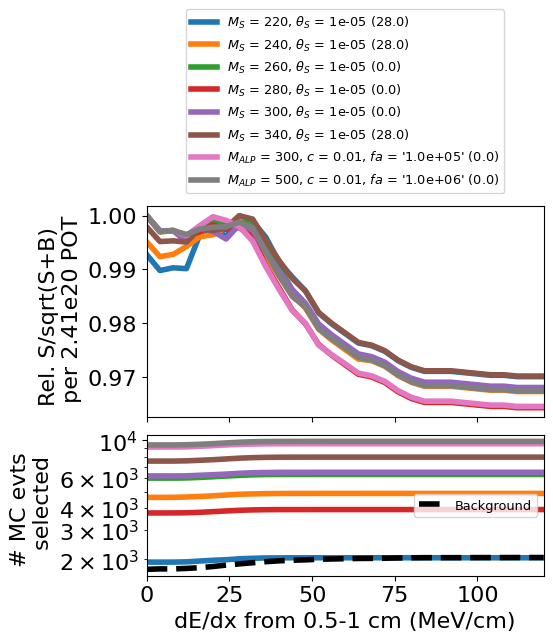

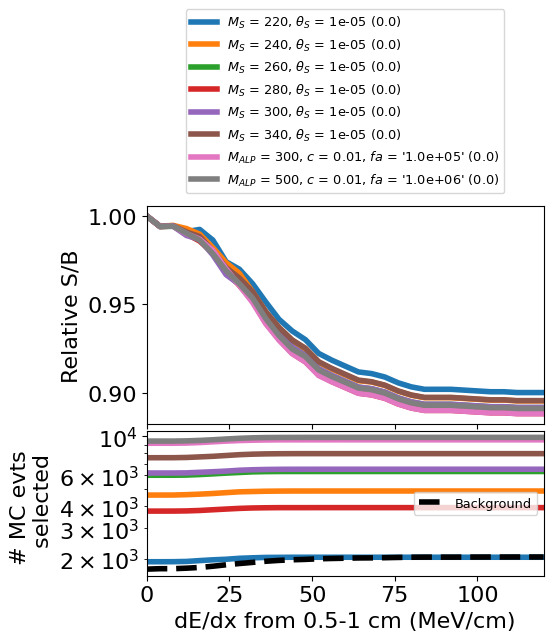

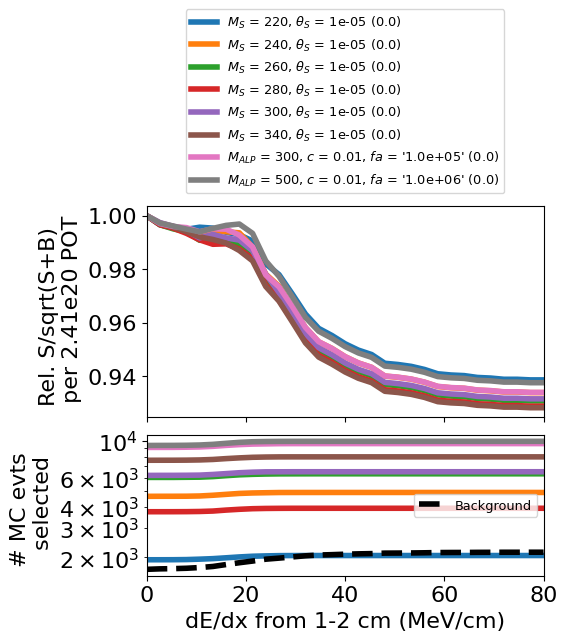

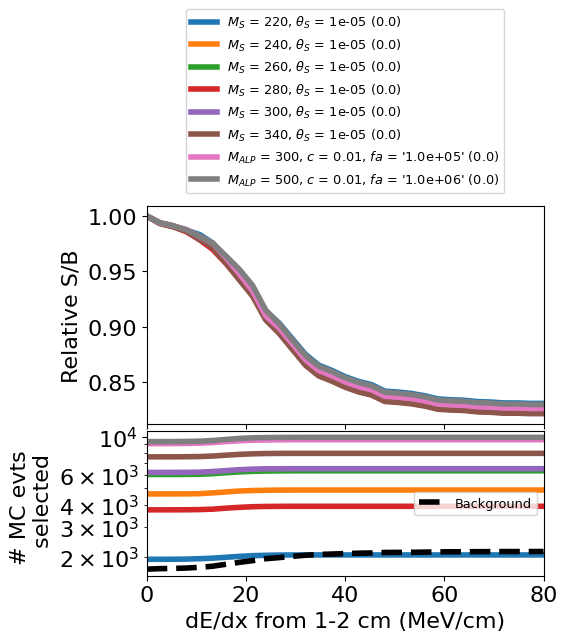

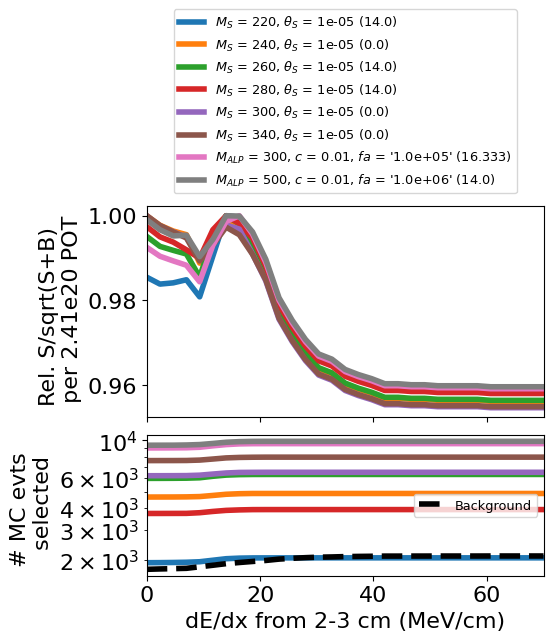

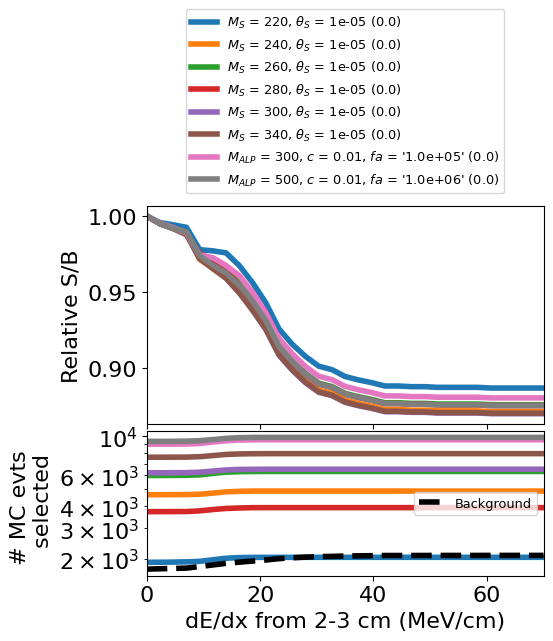

In [31]:
a = optimize_cut(df_0, not_stub_05, np.linspace(0., 200., 31), 'dE/dx up to 0.5 cm (MeV/cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))
a = optimize_cut(df_1, not_stub_1, np.linspace(0., 120., 31), 'dE/dx from 0.5-1 cm (MeV/cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))
a = optimize_cut(df_2, not_stub_2, np.linspace(0., 80., 31), 'dE/dx from 1-2 cm (MeV/cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))
a = optimize_cut(df_3, not_stub_3, np.linspace(0., 70., 31), 'dE/dx from 2-3 cm (MeV/cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))


In [21]:
# PID - chi2 Muon
temp_cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2p,
           numi_angle_mask, open_angle_mask]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]
opt_chi2muon_df = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]


/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


/tmp/ipykernel_26742/3748838454.py:55: RuntimeWarning: invalid value encountered in true_divide
  significance = numerator/denom


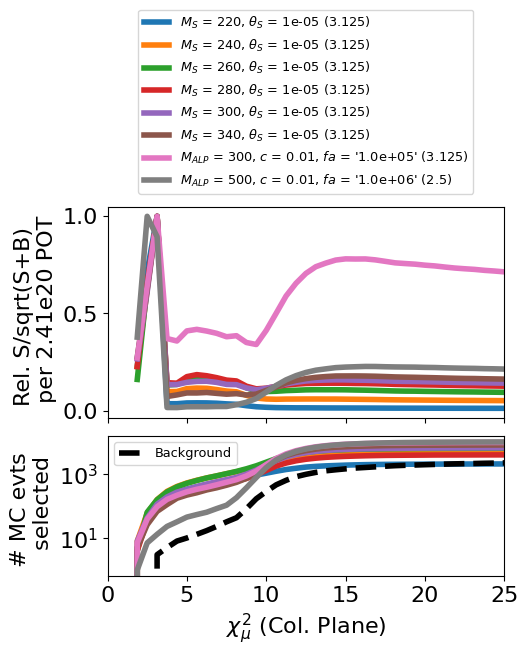

/tmp/ipykernel_26742/3748838454.py:116: RuntimeWarning: divide by zero encountered in true_divide
  SoverB = S/B
/tmp/ipykernel_26742/3748838454.py:116: RuntimeWarning: invalid value encountered in true_divide
  SoverB = S/B


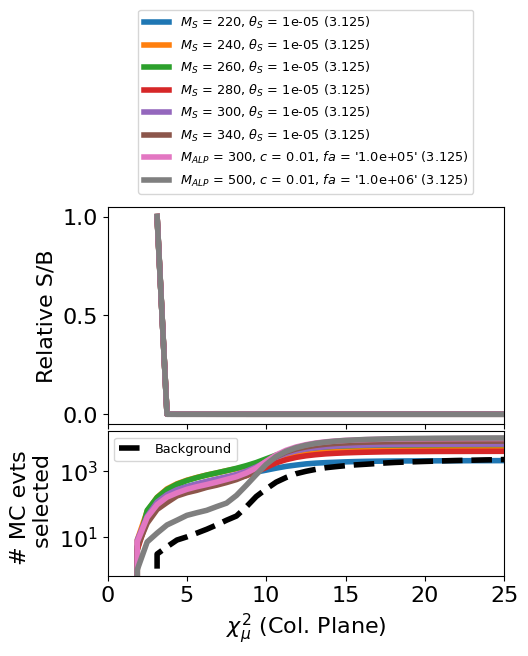

In [22]:
a = optimize_cut(opt_chi2muon_df, ok_chi2mu, np.linspace(0., 25., 41), '$\\chi^2_\\mu$ (Col. Plane)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))


/tmp/ipykernel_26742/3748838454.py:55: RuntimeWarning: invalid value encountered in true_divide
  significance = numerator/denom


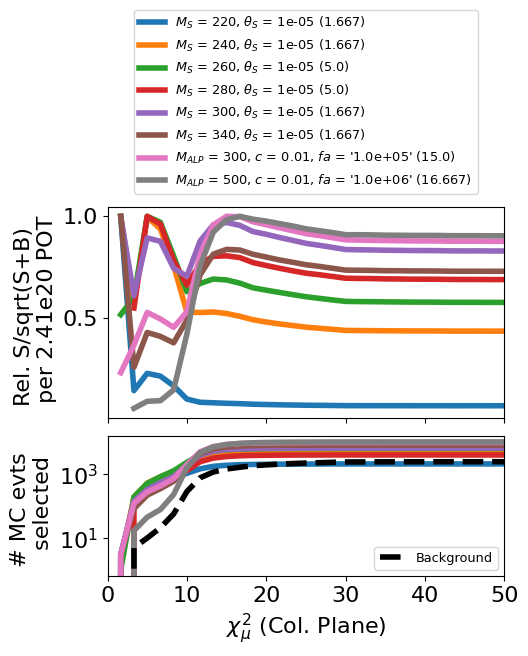

/tmp/ipykernel_26742/3748838454.py:116: RuntimeWarning: divide by zero encountered in true_divide
  SoverB = S/B
/tmp/ipykernel_26742/3748838454.py:116: RuntimeWarning: invalid value encountered in true_divide
  SoverB = S/B


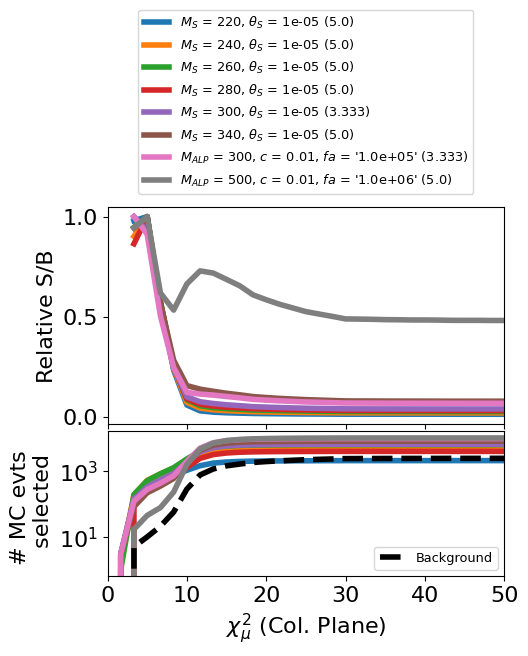

In [23]:
a = optimize_cut(opt_chi2muon_df, ok_chi2mu, np.linspace(0., 50., 31), '$\\chi^2_\\mu$ (Col. Plane)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))


In [35]:
# PID - chi2 Proton
temp_cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu,
           numi_angle_mask, open_angle_mask]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]

opt_chi2p_df = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]


/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


/tmp/ipykernel_15119/2851478342.py:56: RuntimeWarning: invalid value encountered in true_divide
  significance = numerator/denom


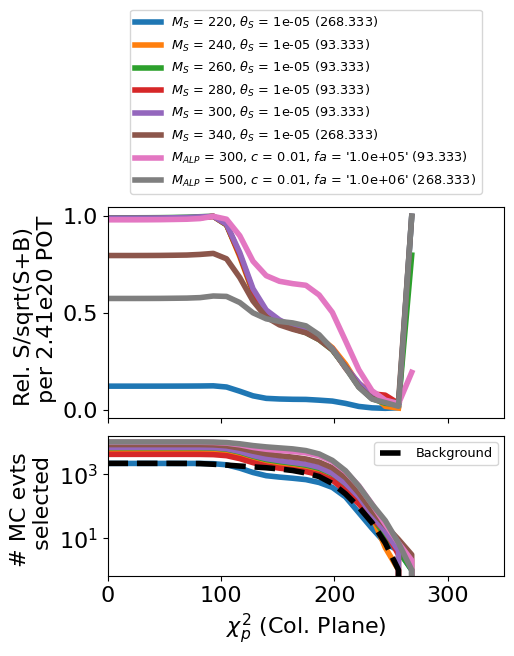

/tmp/ipykernel_15119/2851478342.py:117: RuntimeWarning: divide by zero encountered in true_divide
  SoverB = S/B
/tmp/ipykernel_15119/2851478342.py:117: RuntimeWarning: invalid value encountered in true_divide
  SoverB = S/B


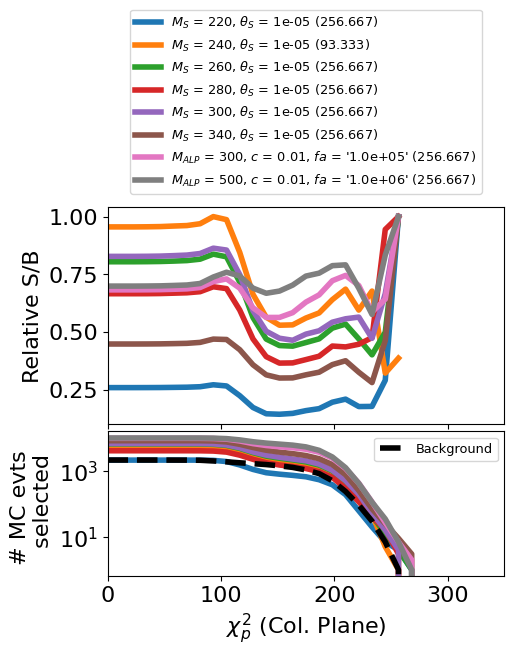

In [36]:
a = optimize_cut(opt_chi2p_df, ok_chi2p, np.linspace(0., 350., 31), '$\\chi^2_p$ (Col. Plane)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))


In [37]:
# scratch

temp_cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]
df = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]


/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [38]:
print(nom_open_angle_thresh)

30


/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_15119/2851478342.py:56: RuntimeWarning: invalid value encountered in true_divide
  significance = numerator/denom


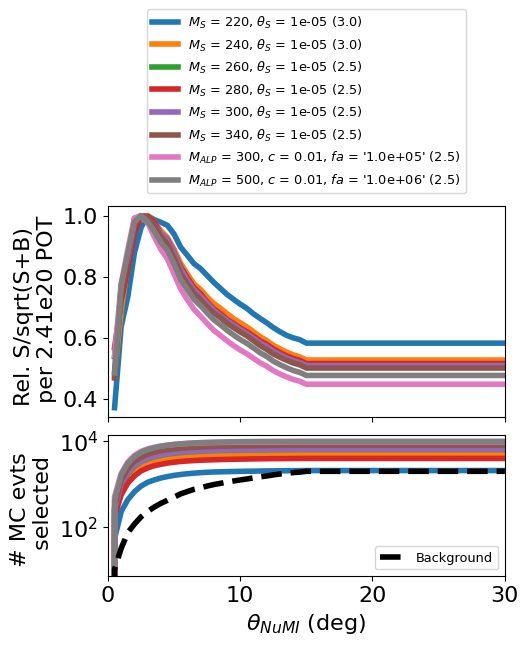

/tmp/ipykernel_15119/2851478342.py:117: RuntimeWarning: invalid value encountered in true_divide
  SoverB = S/B


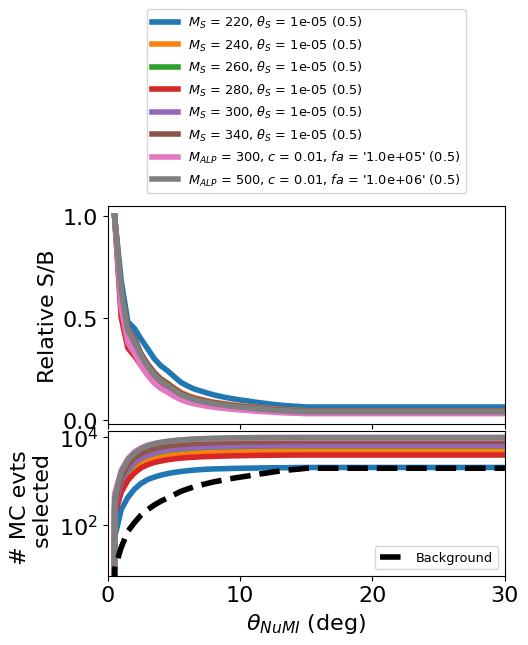

/exp/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: x and y must have same first dimension, but have shapes (51,) and (0,)

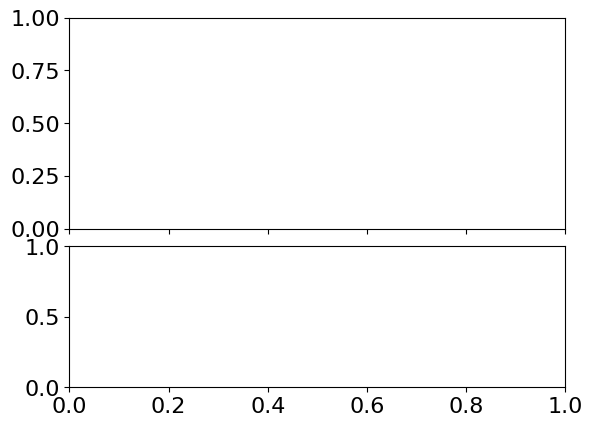

In [39]:
#cut_list_noTrkLenCut = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
#            max_shw_len_mask, ok_chi2mu, ok_chi2p,
#           numi_angle_mask, open_angle_mask]
#thresholds_noTrkLenCut = [
#    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
#    nom_max_shw_len_thresh,
#    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
#    nom_NuMI_angle_thresh, nom_open_angle_thresh
#]

# S_NuMI Angle

cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
            numi_angle_mask, open_angle_mask
           ]
temp_thresholds = [
    nom_stub_dedx_l0_5cm_thresh, nom_stub_dedx_l1cm_thresh, nom_stub_dedx_l2cm_thresh, nom_stub_dedx_l3cm_thresh,
    nom_max_shw_len_thresh,
    nom_chi2_mu_forMuons, nom_chi2_p_forMuons,
    nom_NuMI_angle_thresh, nom_open_angle_thresh
]
df = evtdf[apply_cuts(evtdf, temp_cut_list, thresholds=temp_thresholds, detailed_bsm=True, detailed_nu='none')[-1]]
a = optimize_cut(df, numi_angle_mask, np.linspace(0., 30., 61), '$\\theta_{NuMI}$ (deg)', detailed_bsm=True ,plot=True)


# STUB CUTS

# stub: dqdx up to 0.5
cut_list = [not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
a = optimize_cut(df, not_stub_05, np.linspace(0., 1000000., 51), 'dqdx [#elec/cm] up to 0.5 cm', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))

# stub: dqdx up to 1
cut_list = [not_stub_05, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
a = optimize_cut(df, not_stub_1, np.linspace(0., 1000000., 51), 'dqdx [#elec/cm] up to 1 cm', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))

# stub: dqdx up to 2
cut_list = [not_stub_05, not_stub_1, not_stub_3,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
a = optimize_cut(df, not_stub_2, np.linspace(0., 1000000., 51), 'dqdx [#elec/cm] up to 2 cm', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))

# stub: dqdx up to 1
cut_list = [not_stub_05, not_stub_1, not_stub_2,
            max_shw_len_mask, ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
a = optimize_cut(df, not_stub_3, np.linspace(0., 1000000., 51), 'dqdx [#elec/cm] up to 3 cm', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))


# MUON ID

# mu PID
cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2p,
           numi_angle_mask, open_angle_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
a = optimize_cut(df, ok_chi2mu, np.linspace(0., 60., 31), '$\\chi^2$ Muon (Col. Plane)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))


# proton PID
cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            max_shw_len_mask, ok_chi2mu,
           numi_angle_mask, open_angle_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
a = optimize_cut(df, ok_chi2p, np.linspace(0., 300., 31), '$\\chi^2$ Proton (Col. Plane)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))



## Other trk length

#cut_list = [stub_mask, max_shw_len_mask, both_muon_tracks_mask,
#           numi_angle_mask, open_angle_mask]
#mask = apply_cuts(evtdf, cut_list)[-1]
#df = evtdf[mask]
#a = optimize_cut(df, other_trk_len_mask, np.linspace(0., 50., 51), 'other trk len (cm)', plot=True)

# third trk dist

#cut_list = [both_muon_tracks_mask, numi_angle_mask, open_angle_mask, stub_mask, 
#            max_shw_len_mask, other_trk_len_mask]
#mask = apply_cuts(evtdf, cut_list)[-1]
#df = evtdf[mask]
#a = optimize_cut(df, third_trk_dist_mask, np.linspace(0., 50., 51), 'third trk dist (cm)', plot=True)


## Shorter Track Length

#cut_list = [both_muon_tracks_mask, numi_angle_mask, open_angle_mask, stub_mask, max_shw_len_mask]
#mask = apply_cuts(evtdf, cut_list)[-1]
#df = evtdf[mask]
#a = optimize_cut(df, shortTrk_len_mask, np.linspace(0., 500., 101), 'shorter of tracks len (cm)', plot=True)

In [ ]:
# Max Shower Length
#    Note: the reason the significance isn't 0 if you cut with -11 is because some values are NaN, not just -10.

cut_list = [not_stub_05, not_stub_1, not_stub_2, not_stub_3,
            ok_chi2mu, ok_chi2p,
           numi_angle_mask, open_angle_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
a = optimize_cut(df, max_shw_len_mask, np.linspace(0, 50., 61), 'max shower len (cm)', plot=True) #np.concatenate((np.array([-11]), np.linspace(0., 50., 51)))


In [ ]:
x = np.linspace(0, 1000., 1001)
plt.plot(x, x/np.sqrt(x))
plt.show()

#a = 
b = np.concatenate((np.array([-11.]), np.linspace(0., 50., 51)))


In [ ]:
all_cuts = [both_muon_tracks_mask, numi_angle_mask, open_angle_mask, stub_mask, max_shw_len_mask, shortTrk_len_mask]

# S_NuMI Angle

cut_list = [both_muon_tracks_mask, open_angle_mask, stub_mask, max_shw_len_mask, shortTrk_len_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
#plot_scalar_numi_angle(df, vline=NuMI_angle_thresh, 
#                       sample_description="")
a = optimize_cut(df, numi_angle_mask, np.linspace(0., 0.2, 21), 'S_NuMI_angle (rad)', plot=True)

# Opening angle

cut_list = [both_muon_tracks_mask, numi_angle_mask, stub_mask, max_shw_len_mask, shortTrk_len_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
#plot_trk_open_angle(df, sample_description="\n [after cuts]", 
#                    vline=open_angle_thresh)
a = optimize_cut(df, open_angle_mask, np.linspace(0., 1.0, 21), 'opening angle (rad)', plot=True)

# Max Shower Length

cut_list = [both_muon_tracks_mask, numi_angle_mask, open_angle_mask, stub_mask, shortTrk_len_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
a = optimize_cut(df, max_shw_len_mask, np.linspace(0., 50., 51), 'max shower len (cm)', plot=True)

# Shorter Track Length

cut_list = [both_muon_tracks_mask, numi_angle_mask, open_angle_mask, stub_mask, max_shw_len_mask]
mask = apply_cuts(evtdf, cut_list)[-1]
df = evtdf[mask]
a = optimize_cut(df, shortTrk_len_mask, np.linspace(0., 500., 101), 'shorter of tracks len (cm)', plot=True)